# Unraveling the Essence of Effective Market Segmentation



## Agenda

### [1.) Managerial Summary](#MAN)
### [2.) Setup](#Setup)
- ####  [2.1) Libraries used](#Lib)
- ####  [2.2) Data summaries](#sum)
- ####  [2.3) Irrelevant variables](#irr)


<a id="MAN"></a>
## Managerial summary
In the ever-evolving landscape of modern business, a profound understanding of your customers is the cornerstone of success. Enter market segmentation – an artful strategy that divides the heterogeneous mass of consumers into distinct groups, each with its unique needs, preferences, and behaviors. Yet, segmentation isn't merely a buzzword; it's a science that empowers marketers to craft tailored approaches, engage customers personally, and optimize strategies for maximal impact.

This article embarks on a journey through the intricate world of market segmentation, unraveling its three guiding principles: homogeneity within clusters, heterogeneity between clusters, and the pursuit of actionable insights. Each principle encapsulates a fundamental facet of segmentation, illuminating the quest for clusters that are well-defined, specific, and actionable.

In Part 1, we delve into the meticulous process of forming clusters that harbor true homogeneity. Through techniques like K-means, hierarchical clustering, and DBSCAN, we uncover the art of crafting segments where individuals share more than just a label. We analyze metrics that reveal the elegance of well-structured clusters, and we explore how distinctiveness arises from a symphony of shared attributes.

Transitioning to Part 2, we bridge the gap between theory and application, spotlighting the significance of distinctiveness and identifiability. With the aid of machine learning algorithms, we predict these meticulously formed segments, unveiling the power of clusters that stand out amidst the noise. We engage in a dance between data science and marketing acumen, showcasing how models illuminate the inherent separateness of these segments.

Finally, Part 3 brings us to the crescendo – the moment where segmentation transforms from insight to action. We select the choicest methodology birthed from the first two parts and explore the delicate art of customer profiling. We showcase how these segments, with their unique personas, drive personalized marketing strategies, fostering deeper engagement and loyalty.

Join us on this transformative journey through the layers of market segmentation – a journey that marries data science with marketing intuition, crafting a symphony of strategy that resonates with customers on a profoundly personal level.

## Marketing strategy
### A short primer on segmentation, targeting, and positioning

The Segmentation, Targeting, and Positioning (STP) process is a fundamental framework in marketing that plays a pivotal role in achieving successful market outcomes. This strategic approach empowers businesses to understand and cater to the diverse needs and preferences of their customers. The first step, segmentation, involves dividing the heterogeneous market into smaller, more manageable segments based on shared characteristics like demographics, behavior, or psychographics. This allows marketers to create tailored marketing strategies for each segment, optimizing resource allocation and message resonance.

After segmentation comes targeting, where businesses identify the segments that align most closely with their products or services. By narrowing their focus, companies can allocate their efforts and resources more efficiently, leading to higher customer engagement and conversion rates. This precision targeting ensures that marketing efforts are directed towards the audience most likely to benefit from the offering, ultimately leading to increased sales and brand loyalty.

Finally, positioning involves crafting a unique value proposition for each segment. This ensures that the brand stands out in the minds of consumers, highlighting the distinct benefits it offers compared to competitors. Effective positioning helps establish a strong brand image, leading to enhanced customer recognition, trust, and long-term relationships. Overall, the STP process is crucial in driving business growth, as it enables companies to better understand their audience, optimize marketing strategies, and create lasting connections in today's competitive market landscape.



## The data

### Development setup

The libraries used in this analysis can be divided into three main areas. The first area is data manipulation and visualization with the standard set of data manipulation libraries (numpy, pandas, and datetime) and visualization libraries(seaborn, matplotlib, and plotly). Machine learning wise, we use sklearn, XGBoos, and yellowbrick to modify the data, use crossvalidation, model both classification and regression problems, score the various models used, and finally evaluate them visually. Clustering wise, we focus on scikit-learn again, utilizing the libraires for clustering via the Kmeans, Agglomerative, Meanshift, and DBSCAN algorithms. These are then evaluated using silhouette, Calinski-Harabasz, and the Davies-Bouldin scores. Finally, we employ the use of the Euclidean and Cityblock (Manhattan) distances. 

In [1]:
#Import libraries

#Data manipulation and visualization
import numpy as np
import pandas as pd
import plotly.express as px #for sunburst chart
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

#Machine learning and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ROCAUC, ClassPredictionError, ClassificationReport
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler



#Clustering and data analysis
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean, cityblock



## Data Loading and Basic Summary Statistics

The dataset used in this analysis was obtained from Kaggle and is available at [Kaggle Customer Personality Analysis Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). It provides valuable insights into customer behavior and features the following codebook:

**People**

- **ID:** Unique customer identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Yearly household income
- **Kidhome:** Number of children in the customer's household
- **Teenhome:** Number of teenagers in the customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since the customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- **MntWines:** Amount spent on wine in the last 2 years
- **MntFruits:** Amount spent on fruits in the last 2 years
- **MntMeatProducts:** Amount spent on meat in the last 2 years
- **MntFishProducts:** Amount spent on fish in the last 2 years
- **MntSweetProducts:** Amount spent on sweets in the last 2 years
- **MntGoldProds:** Amount spent on gold in the last 2 years

**Promotion**

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month

This comprehensive codebook provides a detailed overview of the dataset, including customer demographics, purchase behavior, responses to marketing campaigns, and interaction with various sales channels.

### Initial Data Cleaning

During the initital data cleaning step, two types of columns are considered. Columns that offer no explanatory value (i.e., have constant values) are removed from the dataset. In the output below, you can see that the "ID" variable, as well as "Z_CostContract" and "Z_Revenue," have been removed. This is because they offer no explanatory purpose, having either only one value or having the same number of values as the length of the datset (ID's when there is no additonal data to merge on). The data was loaded using pandas with the backslash ('\') separator.

In [2]:
#Basic summary statistics
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
df=pd.read_csv("marketing_campaign.csv",delimiter="\t")
print("Head:")
display(df.head())
print("Describe")
display(df.describe())
print("Info:")
display(df.info())

Head:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

Describe


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-nu

None

In [3]:
# Which columns have only unique values? Which are the same?

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")
    if unique_values == 1 or unique_values == 2240:
        df.drop(column, axis=1, inplace=True)

Column: ID, Unique Values: 2240
Column: Year_Birth, Unique Values: 59
Column: Education, Unique Values: 5
Column: Marital_Status, Unique Values: 8
Column: Income, Unique Values: 1974
Column: Kidhome, Unique Values: 3
Column: Teenhome, Unique Values: 3
Column: Dt_Customer, Unique Values: 663
Column: Recency, Unique Values: 100
Column: MntWines, Unique Values: 776
Column: MntFruits, Unique Values: 158
Column: MntMeatProducts, Unique Values: 558
Column: MntFishProducts, Unique Values: 182
Column: MntSweetProducts, Unique Values: 177
Column: MntGoldProds, Unique Values: 213
Column: NumDealsPurchases, Unique Values: 15
Column: NumWebPurchases, Unique Values: 15
Column: NumCatalogPurchases, Unique Values: 14
Column: NumStorePurchases, Unique Values: 14
Column: NumWebVisitsMonth, Unique Values: 16
Column: AcceptedCmp3, Unique Values: 2
Column: AcceptedCmp4, Unique Values: 2
Column: AcceptedCmp5, Unique Values: 2
Column: AcceptedCmp1, Unique Values: 2
Column: AcceptedCmp2, Unique Values: 2
Col

In [ ]:
## Data Cleaning, Variable Treatment, and Exploratory Data Analysis



## Categorical variable treatment

### Marital status 
The distribution of values within the marital status variable reveals a mixture of standard and unusual entries. Among them, the label "alone" can be appropriately mapped to "single," preserving the underlying information. On the other hand, the designations "Absurd" and "YOLO" present concerns, as they introduce uncertainty and skepticism into the data analysis. Furthermore, the presence of the "YOLO" entry, differing only by acceptance of the final promotional campaign, hints at a potential duplicate observation. As we navigate these intricacies, ensuring data integrity and consistency remains paramount we also change the observations with the "Alone" entry to "Single". 

In [4]:
#Marital Status Value counts
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [5]:
#Marital Status YOLO and Absurd
display(df[df["Marital_Status"]=="YOLO"])
df.drop([2177,2202], inplace=True)

display(df[df["Marital_Status"]=="Absurd"])
df.drop([2093,2134], inplace=True)


Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2177        1973       PhD           YOLO  48432.0        0         1   
2202        1973       PhD           YOLO  48432.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2177  18-10-2012        3       322          3               50   
2202  18-10-2012        3       322          3               50   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2177                4                 3            42                  5   
2202                4                 3            42                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2177                7                    1                  6   
2202                7                    1                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2177                  8             0             0             0   
2202                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2177             0             0         0         0  
2202             0             0         0         1

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2093        1993  Graduation         Absurd  79244.0        0         0   
2134        1957      Master         Absurd  65487.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2093  19-12-2012       58       471        102              125   
2134  10-01-2014       48       240         67              500   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2093              212                61           245                  1   
2134              199                 0           163                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2093                4                   10                  7   
2134                3                    5                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2093                  1             0             0             1   
2134                  2             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2093             1             0         0         1  
2134             0             0         0         0

In [6]:
#Marital Status Replacing alone for single
df["Marital_Status"] = df["Marital_Status"].replace("Alone", "Single")

### Education

For improved clarity, we will translate the "Education" variable as follows: "Graduation" will be changed to "High School," "2n Cycle" to "Bachelor," and "Basic" to "Elementary."

In [7]:
# Education
df["Education"].value_counts()

Graduation    1126
PhD            484
Master         369
2n Cycle       203
Basic           54
Name: Education, dtype: int64

## Numeric variables treatment

### Time variable transformations

This step deals with the Year_Birth variable. The data is from 2014. For both data quality purposes (it is harder to notice a strange age having the year of birth) and profiling in the later parts of this report, it will be converted to age. 
Additionally, the variable containing the date the consumer enrolled with the company was transformed into a date variable and then used to calculate the tenure in months. The reference date given in the dataset resulted in obtaining negative values and was as such increased by two months to obtain zeroes at least. Finally, as the recency is in days, for the purpose of later calculations, the seniority will be in days as well.

In [8]:
#Calculating age
df['Age'] = 2014 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)


In [9]:
#Calculating the seniority
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Convert to datetime 
reference_date = datetime(2014, 12, 30)

# Calculate the time duration for each row
df['TenureDays'] = ((reference_date-df['Dt_Customer']).dt.days)

# Removing the negatives
#print(df)
#negative_tenure_count = (df['TenureMonths'] < 0)
#df[df['TenureMonths'] < 0]
#print(negative_tenure_count.sum())

/tmp/ipykernel_6187/2618945664.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



## IQR analysis

Upon analyzing the outlier results below, it becomes evident that merely four variables remain free from outlier influence. These variables encompass aspects such as the number of children and teenagers at home, the recency of purchases, and the count of store purchases. Noteworthy is the presence of outliers in relation to age, with the upper bound revealing three instances that exhibit an average age of 116. Given this observation, it is recommended to investigate these data points for potential anomalies.

Delving into the income distribution, the lower bound exhibits an absence of outliers. However, the upper bound registers eight observations that surpass the mean income considerably, averaging at 221,604 units in contrast to the column mean of 52,232 units. This discrepancy necessitates further scrutiny to ensure data accuracy.

The variables associated with the quantity of purchased product types, such as wines, display a propensity for outliers, primarily concentrated around the upper bounds. These outliers account for approximately 10% of the data points in each respective case. Notably, most of these outliers maintain an average of around 150 units, with the exception of meat and wine products. These two categories exhibit exceptionally high values of approximately 750 and 1,341 units, respectively. Given the magnitude of these outliers, a thorough investigation is warranted to validate their authenticity.

Examining the shopping preference variables, which indicate purchases made online versus in-store, reveals a lack of lower bound outliers, particularly noteworthy in the case of in-store purchases which show no outliers at all. Conversely, upper bound outliers are prevalent, particularly pronounced in the context of web purchases. Despite this, the proportion of outliers in this column remains minimal at just 0.18%, suggesting a potential avenue for deeper analysis.

Observing the Age of the consumers, there are extreme values in the upper bound, with the average among the outliers being 116.67. Clearly, these observations need to be checked for errors. 

In the context of deal purchases and the accepted campaign columns, it is evident that a significant majority of consumers do not respond to the promotional efforts of the company. On average, consumers engage with only two promotional offers, while those within the upper bound exhibit an average engagement with nearly nine promotions. The "AcceptedCmp" columns consistently portray that all instances of accepted promotions are classified as outliers. Please note that the accepted campaign columns show only the latest promotional efforts. There are observations with values above zero for the "number of deals purchased" and no accepted campaigns. 
Conversely, the low occurrence of complaints, merely 21 instances within the dataset, raises concerns, potentially indicating a reluctance among consumers to communicate grievances with the company. This finding warrants further consideration, as it could imply a lack of perceived value in engaging with the company's customer service channels.

In [10]:
#Outlier analysis

# Defining the numeric columns and selecting only those for outlier analysis
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    print("-"*50)
    print(column)
    print("-"*50)
    mean_value = df[column].mean()
    print("The mean value of this column is: {:.2f}".format(mean_value))
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    if len(outliers) == 0:
        print("This column has no outliers")
        print("\n")
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_percentage = len(outliers) / len(df[column]) * 100
        formatted_percentage = "{:.2f}".format(outlier_percentage)
        print("This column has " + formatted_percentage + "% of outliers.")
        #Stats for the lower bound
        low = df[column][(df[column] < lower_bound)]
        len_low=len(low)
        avg_low=low.mean()
        avg_low = "{:.2f}".format(avg_low)
        #Stats for the upper bound
        high = df[column][(df[column] > upper_bound)]
        len_high=len(high)
        avg_high=high.mean()
        avg_high = "{:.2f}".format(avg_high)

        #Statement on bounds
        if len_low!=0:
            print("The lower bound is " + str(len_low) +  " observations long and has a mean of " +  str(avg_low))
        else:
            print("The lower bound has no outliers")
        if len_high!=0:
            print("The upper bound is " + str(len_high) +  " observations long and has a mean of " +  str(avg_high))
        else:
            print("The upper bound has no outliers")

        print("\n")

--------------------------------------------------
Income
--------------------------------------------------
The mean value of this column is: 52232.51
This column has 0.36% of outliers.
The lower bound has no outliers
The upper bound is 8 observations long and has a mean of 221604.50


--------------------------------------------------
Kidhome
--------------------------------------------------
The mean value of this column is: 0.44
This column has no outliers


--------------------------------------------------
Teenhome
--------------------------------------------------
The mean value of this column is: 0.51
This column has no outliers


--------------------------------------------------
Recency
--------------------------------------------------
The mean value of this column is: 49.15
This column has no outliers


--------------------------------------------------
MntWines
--------------------------------------------------
The mean value of this column is: 303.87
This column has 1.57%

### Age analysis

The output reveals three instances where the recorded ages of consumers are beyond the improbable range of 100 years or older. This discrepancy highlights a data quality concern that warrants immediate attention. Given the substantial size of the dataset, it is advisable to rectify this issue by excluding these outlier observations from further analysis. Additionally, it is recommended to communicate with the data collection team to implement measures that can assist in improving the accuracy of age records during the data collection process.

In [11]:
#Age analysis

Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_analysis=df[df["Age"]>upper_bound]
age_analysis
df = df[df["Age"] <= 100]

### Acceptance of sales campaigns
When examining the acceptance rate of sales campaigns among consumers, the insights gleaned from the pie chart are striking. Merely a quarter (25.3%) of our consumer base has shown receptivity to campaigns. Furthermore, a smaller fraction of consumers (10.64%) have embraced multiple campaigns. These figures underscore the imperative for the company to enhance its product or service offering and communication strategy, facilitating better engagement with consumers.

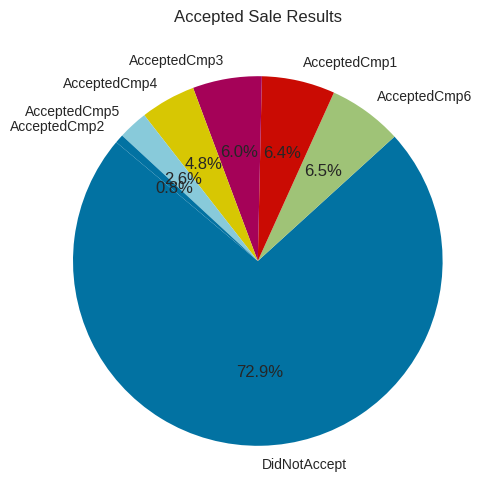

In [12]:
#Pie chart
df = df.rename(columns={'Response': 'AcceptedCmp6'}) # In another task this was supposed to 
#be the response variable, but it actually means that the sale was accepted in the final offer

#The idea is to try predicting when the customer will accept the sale
accepted_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp6"]

df['Result'] = df[accepted_columns].apply(lambda row: row.idxmax() if row.any() else None, axis=1)
df['Result'] = df['Result'].fillna("DidNotAccept")
result_counts = df['Result'].value_counts(normalize=True, sort=True)

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Accepted Sale Results')
plt.show()

In [13]:
#Accepted comp. Is it possible to accept multiple times?
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# Check if at least two columns have a value of 1
x = (df[accepted_cols] == 1).sum(axis=1) >= 2
x.value_counts()
df=df.drop(columns=["Result"])

### Meat products and wine bought

The two scatterplot charts displayed below depict the relationship between customer income and the quantity of meat products and wine products purchased. An intriguing observation emerges as we identify a group with significantly low income levels that has made substantial purchases of meat products. This anomaly is likely a data entry error and will be excluded from our analysis. While both charts reveal instances of customers making unusually large purchases, these instances are accompanied by exceptionally high incomes. Consequently, we opt to retain these data points for further investigation.

Notably, there was an outlier in the dataset with an income value of "666,666," which was omitted from the charts. This entry is deemed unreliable, casting doubt on the accuracy of other associated data points and justifying its removal from our analysis.

In [14]:
#Removing errenious variables 1
display(df[df["Income"]==666666.0])
df = df[df["Income"] != 666666.0]

Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
2233  Graduation       Together  666666.0        1         0  2013-02-06   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2233       23         9         14               18                8   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2233                 1            12                  4                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2233                    1                  3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2233             0             0             0             0         0   

      AcceptedCmp6  Age  TenureDays  
2233             0   37         692

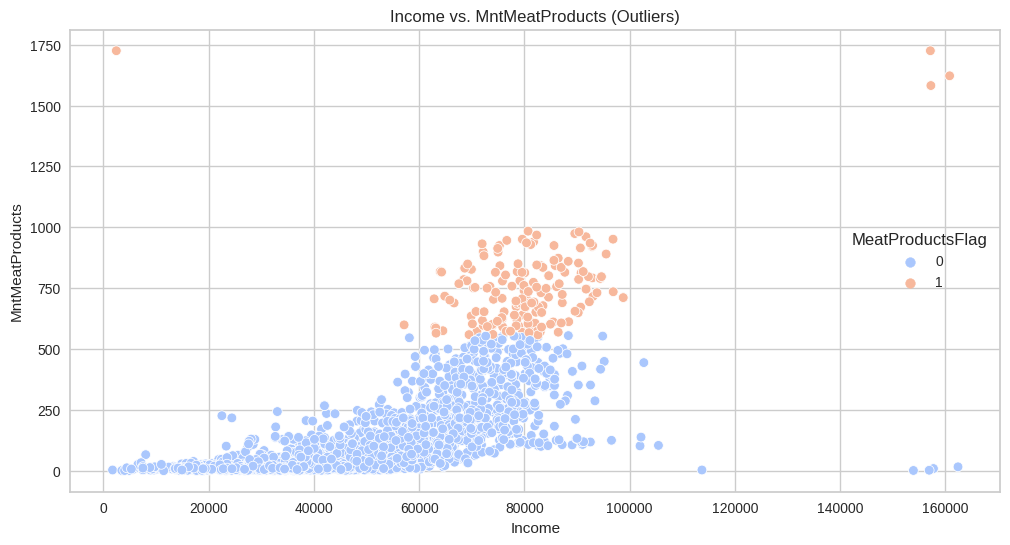

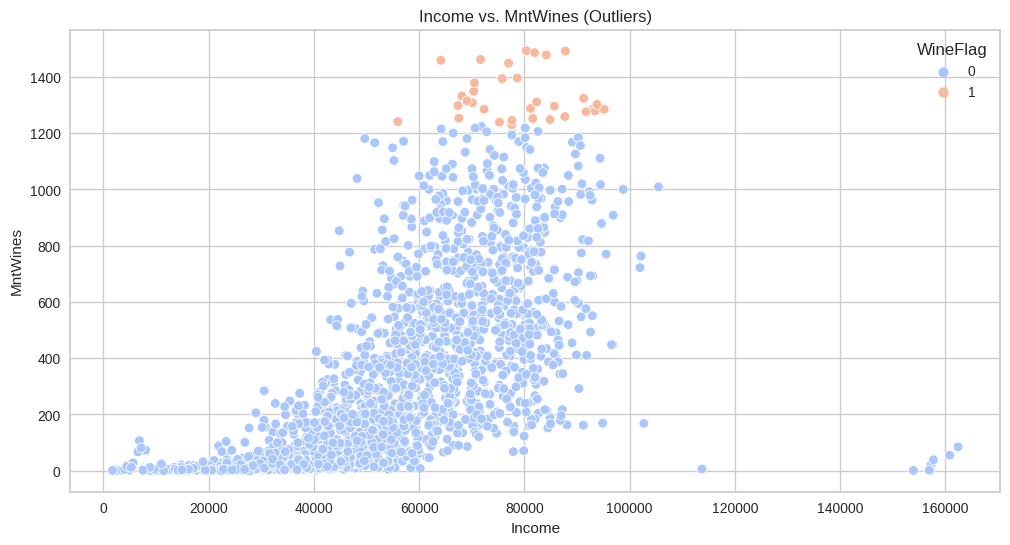

In [15]:
### Meat and wine product amount


ProductOutliers=df.copy()

#MntWines MntWines

Q1 = df["MntWines"].quantile(0.25)
Q3 = df["MntWines"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ProductOutliers["WineFlag"]=np.where(df["MntWines"]>upper_bound, 1,0)

Q1 = df["MntMeatProducts"].quantile(0.25)
Q3 = df["MntMeatProducts"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ProductOutliers["MeatProductsFlag"]=np.where(df["MntMeatProducts"]>upper_bound, 1,0)

#Creating the visualizations

# Create a scatterplot for MeatProductsFlag
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ProductOutliers, x="Income", y="MntMeatProducts", hue="MeatProductsFlag", palette="coolwarm")
plt.title("Income vs. MntMeatProducts (Outliers)")
plt.xlabel("Income")
plt.ylabel("MntMeatProducts")

# Create a scatterplot for WineFlag
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ProductOutliers, x="Income", y="MntWines", hue="WineFlag", palette="coolwarm")
plt.title("Income vs. MntWines (Outliers)")
plt.xlabel("Income")
plt.ylabel("MntWines")

# Show scatterplots
plt.show()



In [16]:
#Removine erenious variables 2
df = df[~((df["Income"] < 10000) & (df["MntMeatProducts"] > 1600))]


### Income analysis and imputation

The income variable contained 34 missing values. To address this issue, a Random Forest Regressor was employed, utilizing cross-validation for hyperparameter tuning via grid search. The scoring metric chosen was the Negative Mean Squared Error (NMSE). Additionally, categorical variables were preprocessed using one-hot encoding. The optimal hyperparameter configuration included no maximum depth constraint, a minimum of one sample per leaf, and a total of 100 estimators. This configuration yielded an R² of 0.76 and an RMSE of 10,628. Considering the income values range up to 160,000, this imputation result is deemed satisfactory.

Below, you will find the code to derive these hyperparameters. Please note that the code has been commented out to enhance the notebook's runtime efficiency.

In [17]:
#Creating and outputing the missing flags

df["MissingFlag"]=np.where(df['Income'].isnull(), 1, 0)
df["MissingFlag"].value_counts()

0    2207
1      24
Name: MissingFlag, dtype: int64

In [18]:
#imputation. Uncomment to run analysis and view output
"""
# Copy the DataFrame and drop rows with missing values in the "Income" column
df_copy = df.dropna(subset=["Income"]).copy()

# Drop the "Result" and "Dt_customer" columns
df_copy.drop(["Dt_Customer"], axis=1, inplace=True)

# Define features (X) and target (y)
X = df_copy.drop("Income", axis=1)
y = df_copy["Income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns for one-hot encoding
categorical_cols = ["Education", "Marital_Status"]

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_cols)
    ],
    remainder="passthrough"
)

# Define the Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf_regressor)
])

# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # You can use other metrics here
    cv=10,  # 10-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress during fitting
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model from hyperparameter tuning
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"Root mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")
# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("mse "+ str(mse))
print("rmse " + str(rmse))

"""


'\n# Copy the DataFrame and drop rows with missing values in the "Income" column\ndf_copy = df.dropna(subset=["Income"]).copy()\n\n# Drop the "Result" and "Dt_customer" columns\ndf_copy.drop(["Dt_Customer"], axis=1, inplace=True)\n\n# Define features (X) and target (y)\nX = df_copy.drop("Income", axis=1)\ny = df_copy["Income"]\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define categorical columns for one-hot encoding\ncategorical_cols = ["Education", "Marital_Status"]\n\n# Create a column transformer for preprocessing\npreprocessor = ColumnTransformer(\n    transformers=[\n        ("cat", OneHotEncoder(), categorical_cols)\n    ],\n    remainder="passthrough"\n)\n\n# Define the Random Forest Regressor model\nrf_regressor = RandomForestRegressor()\n\n# Create a pipeline for preprocessing and modeling\npipeline = Pipeline([\n    ("preprocessor", preprocessor),\n    ("model", rf_regresso

In [19]:
#Best model used for imputation
# Copy the DataFrame and drop rows with missing values in the "Income" column
df_copy = df.dropna(subset=["Income"]).copy()

# Drop the "Result" and "Dt_customer" columns
df_copy.drop(["Dt_Customer"], axis=1, inplace=True)

# Define features (X) and target (y)
X = df_copy.drop("Income", axis=1)
y = df_copy["Income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns for one-hot encoding
categorical_cols = ["Education", "Marital_Status"]

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_cols)
    ],
    remainder="passthrough"
)

# Define the Random Forest Regressor model with specified hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1
)

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf_regressor)
])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Predict income on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Impute missing "Income" values using the trained model
missing_income_rows = df[df["Income"].isna()]

# Extract the features for prediction (excluding "Income", "Result", and "Dt_customer")
X_missing_income = missing_income_rows.drop(["Income"], axis=1)

# Use the trained model to predict the missing "Income" values
predicted_income = pipeline.predict(X_missing_income)

# Update the "Income" column in the original DataFrame with the predicted values
df.loc[missing_income_rows.index, "Income"] = predicted_income


Root Mean Squared Error (RMSE): 10341.42
R-squared (R²): 0.78
Mean Absolute Error (MAE): 5703.43


# Clustering Evaluation

The evaluation of clusters will be completed using three indices: the silhouette coeficient, the Calinski-Harabasz index, and the Davies-Bouldin index. These were selected as they do not require the ground truth of which observation belongs to which cluster as well as being capable of being used in all possible clustering methods as they require only the cluster label and the observations themselves.

## Silhouette coefficient
The Silhouette coeficient measure the cohesion and seperation of clusters. It is calculated for each observation and then averaged across all observations. The coefficient itself is bound between -1 and 1 where -1 shows a really badly completed clustering and 1 the opposite; dense very separated clusters. 0 shows overlaping clusters.

Mathematical formulation:

s = (b - a) / (max(a, b) - min(a, b))

Where a is the mean distance between a sample and all of the other points within that cluster and b is the mean distance between a sample and all of the other points of the closest cluster.


## Calinski-Harabasz Index
The Calinski-Harabasz index measure the ration of between cluster variance and within cluster variance.  This method, also known as the Variance Ratio criterion can easily be interpreted as the higher, the better the clustering. 

Mathematical formulation:
 
 CH = (B / W) * (n - k) / (k - 1)

To calculate the index, first the centroid of each cluster is calculated, along with the centroid of all of the datapoints. For each cluster centroid we then calculate the between (b in the formula) and within (w in the formula) dispersion. The between cluster dispersion is defined as the sum of the squared euclidean distances between the centroid of the dataset and the cluster centroids themselves. The within cluster dispersion is defined as the sum of the squared euclidean distances within the clusters, that is the distance between each observation and the cluster centroid.  The Calinski-Harabasz Index is obtained by dividing the between-cluster dispersion (b) by the within-cluster dispersion (w) and then multiplying it by a factor that accounts for the number of data points (n) and the number of clusters (k). The resulting index provides a measure of how well-separated the clusters are and how well the data points are clustered together within each cluster. A higher Calinski-Harabasz Index value indicates better clustering with distinct and well-separated clusters.

## Davies-Bouldin Index
The Davies-Bouldin Index measure the average simmilarity between each cluster and its most simmilar cluster. It is specific among the other non-ground truth needing methods of defining the quality of the clustering in such a way that the lower the score, the better the separation between clusters. 

Mathematical formulation:

DB = (1 / k) * ∑ (max(R_i + R_j) / δ(Ci, Cj))

Where k is the number of clusters, R_i and R_j are the average distance between the cluster and its centroids and δ(Ci, Cj) are the distances between the beforementioned clusters. 

## Score Visualization

The example below illustrates the potential ranges that the aforementioned clustering evaluation metrics can encompass. The top row depicts scenarios where the number of clusters is accurately chosen, aligning with the dataset's inherent centers. The initial chart portrays two clusters, each with minimal standard deviation in their centroids. In this case, the silhouette score approaches its maximum, the Calinski-Harabasz index is substantially high, and the Davies-Bouldin index nearly reaches zero. However, as the clusters' standard deviation expands, leading to greater dispersion, the silhouette score declines, and the Calinski-Harabasz index decreases. Eventually, as clusters overlap or merge, the Davies-Bouldin index rises toward its technical maximum (even though it may not exceed 1 in most cases). During this phase, both the silhouette score and the Calinski-Harabasz index reach their lowest values.

The second row focuses on silhouette scores closer to zero. Here, the datasets are designed with a reduced number of centers compared to the actual clusters. Consequently, some clusters are inevitably unrepresented, leading to diminished scores. This scenario results in both the silhouette coefficient and the Davies-Bouldin index reaching low levels. By augmenting the clusters' standard deviation, the Calinski-Harabasz score also experiences a decline.

In [20]:
#Create the datasets

# Generate the datasets
datasets = []

# Dataset 1: Good Silhouette, Good DB Index(low), Good CH Index(high)
data_1, _ = make_blobs(n_samples=500, centers=2,cluster_std=0.1, random_state=42)
data_1 = StandardScaler().fit_transform(data_1)
df_1 = pd.DataFrame(data_1, columns=["Feature 1", "Feature 2"])
datasets.append(df_1)

# Dataset 2: Good Silhouette, Bad DB Index(>1), Bad CH Index(low)
data_2, _ = make_blobs(n_samples=500, centers=2, random_state=42)
data_2 = StandardScaler().fit_transform(data_2)
df_2 = pd.DataFrame(data_2, columns=["Feature 1", "Feature 2"])
datasets.append(df_2)

# Dataset 3: Good Silhouette, Bad/Medium DB Index, Good CH Index
data_3, _ = make_blobs(n_samples=500, centers=2,cluster_std=7, random_state=42)
data_3 = StandardScaler().fit_transform(data_3)
df_3 = pd.DataFrame(data_3, columns=["Feature 1", "Feature 2"])
datasets.append(df_3)

##############################
# Dataset 4: Loq Silhouette, Good DB Index, Bad CH Index
data_4, _ = make_blobs(n_samples=500, centers=100,cluster_std=0.1, random_state=42)
data_4 = StandardScaler().fit_transform(data_4)
df_4 = pd.DataFrame(data_4, columns=["Feature 1", "Feature 2"])
datasets.append(df_4)
# Dataset 5: Large number of centers
data_5, _ = make_blobs(n_samples=500, centers=10,  random_state=42)
data_5 = StandardScaler().fit_transform(data_5)
df_5 = pd.DataFrame(data_5, columns=["Feature 1", "Feature 2"])
datasets.append(df_5)
# Dataset 6: Large number of std
data_6, _ = make_blobs(n_samples=500, centers=1, cluster_std=7,random_state=42)
data_6 = StandardScaler().fit_transform(data_6)
df_6 = pd.DataFrame(data_6, columns=["Feature 1", "Feature 2"])
datasets.append(df_6)

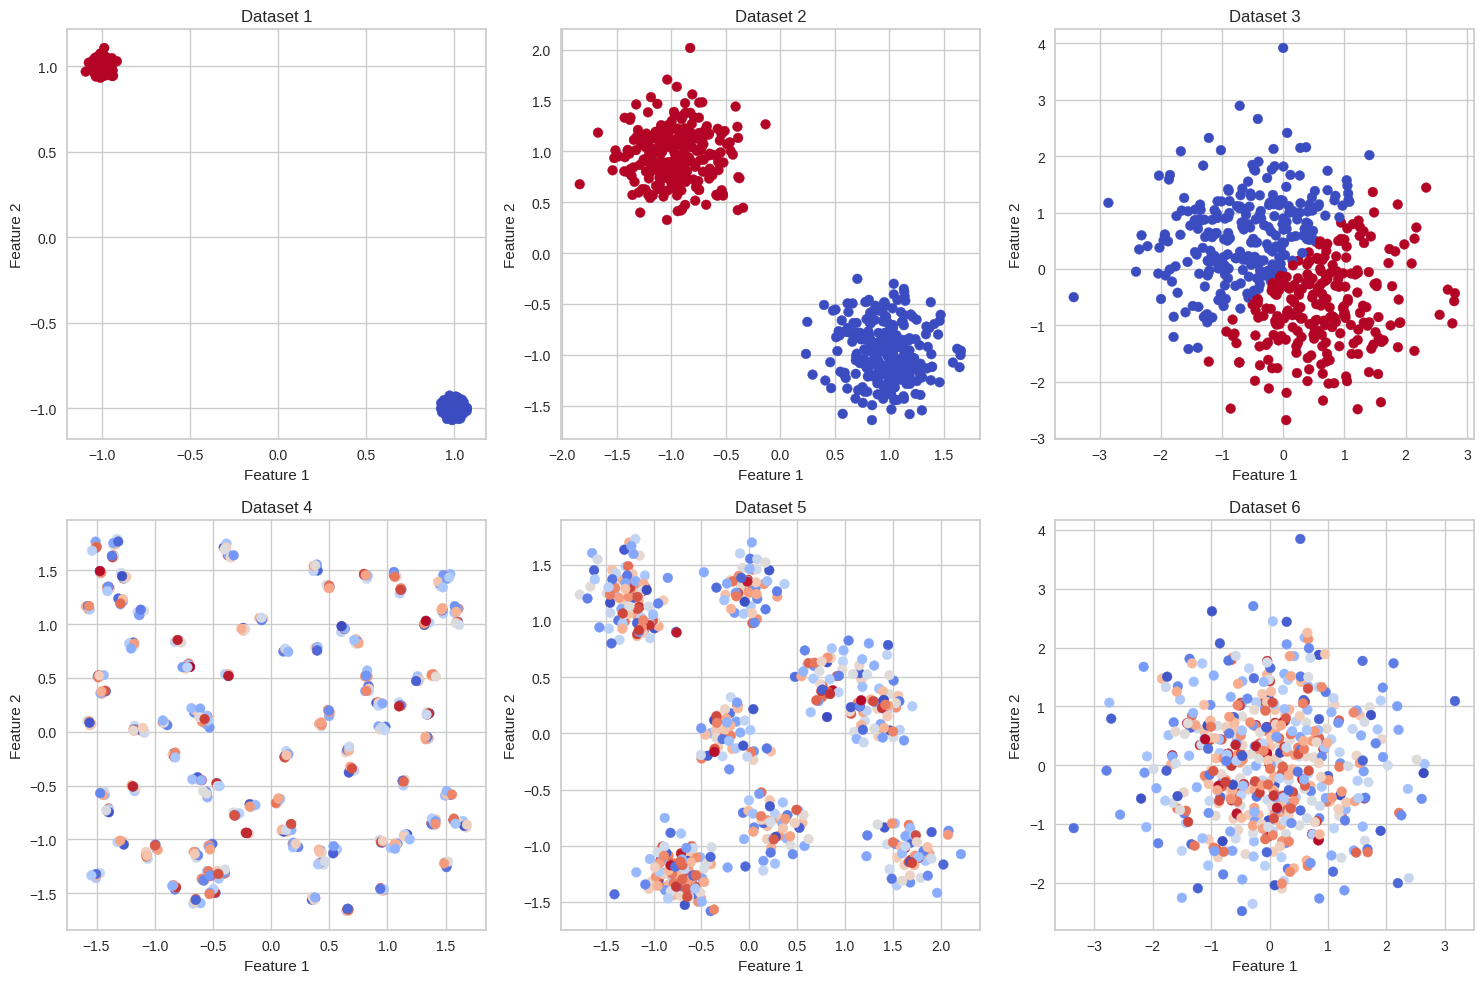

     Dataset  Silhouette Score Calinski-Harabasz Index  Davies-Bouldin Index
0  Dataset 1          0.982662               653833.18              0.024495
1  Dataset 2          0.825833                 6521.63              0.245266
2  Dataset 3          0.362183                  346.11              1.056550
3  Dataset 4          0.003892             16523312.06              0.000255
4  Dataset 5          0.003783             12113610.43              0.000519
5  Dataset 6          0.003556               316675.59              0.002297


In [21]:
#Plot the clustered datasets

datasets = [df_1, df_2, df_3, df_4, df_5, df_6]
results = []

# Create subplots for all datasets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, data in enumerate(datasets):
    if i <3:
        n_clusters=2
    else:
        n_clusters=499
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
    data["segment"] = kmeans.fit_predict(data)
    
    # Calculate the metrics
    sil_score = silhouette_score(data[["Feature 1", "Feature 2"]], data["segment"])
    calinski_harabasz_index = calinski_harabasz_score(data[["Feature 1", "Feature 2"]], data["segment"])
    formatted_calinski_harabasz_index = f"{calinski_harabasz_index:.2f}"
    davies_bouldin_index = davies_bouldin_score(data[["Feature 1", "Feature 2"]], data["segment"])
    
    # Append scores to results
    results.append({
        "Dataset": f"Dataset {i+1}",
        "Silhouette Score": sil_score,
        "Calinski-Harabasz Index": formatted_calinski_harabasz_index,
        "Davies-Bouldin Index": davies_bouldin_index
    })
    
    # Scatterplot
    ax = axes[i // 3, i % 3]
    scatter = ax.scatter(data["Feature 1"], data["Feature 2"], c=data["segment"], cmap='coolwarm')
    ax.set_title(f"Dataset {i+1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    

# Create a dataframe with results
results_df = pd.DataFrame(results)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Display the results dataframe
print(results_df)


# RFM 
Recency, Frequency, Monetary (RFM) segmentation is a time-tested method in marketing that holds immense importance in understanding customer behavior and optimizing marketing strategies. Originating in direct mail marketing, RFM has evolved into a versatile framework for segmenting customers based on their interactions with a brand. Recency refers to the time since a customer's last purchase, Frequency measures the number of purchases within a specific period, and Monetary denotes the total amount spent by the customer.

To calculate RFM scores, customers are assigned numerical values for each parameter, resulting in individual scores for Recency, Frequency, and Monetary aspects. These scores are then used to categorize customers into various segments, such as "Champions," "Loyal Customers," "At Risk," and more. The RFM approach is effective because it doesn't rely on demographic information alone; instead, it captures actionable insights directly related to customer engagement and purchasing behavior.

The importance of RFM segmentation lies in its ability to provide actionable insights for targeted marketing campaigns. By categorizing customers based on their engagement level and purchase history, businesses can create tailored messages and offers that resonate with specific segments. This personalization enhances customer experiences, drives repeat purchases, and strengthens brand loyalty. Furthermore, RFM segmentation allows companies to allocate marketing resources efficiently, focusing on high-value segments and preventing customer churn. In a world inundated with data, RFM stands as a reliable and valuable tool for businesses seeking to forge meaningful connections with their customers and optimize marketing outcomes.

## RF/RFM clustering

The visualization below highlights the limitations of relying solely on the "Recency" (R) and "Frequency" (F) metrics from the RFM method. While it's true that a customer's purchase frequency contributes to their overall monetary value, this approach lacks the ability to distinguish between a customer who makes daily purchases of high-value items like wine and steak and one who buys a pack of gum daily.

In this analysis, both the RF and RFM datasets will be examined simultaneously, but it's important to note that they should not be directly compared. This simultaneous examination is for convenience purposes. The primary goal is to assess how effectively they capture distinctiveness, identifiability, and customer profiling in those (later) stages of the analysis. 

Please be aware that an **extreme** simplification will be used in this analysis, and the clusters will be visualized on a 2D plot to facilitate a comparison with the traditional cutoff method of segmentation.

## Binned V.S. continous

In the context of this analysis, the introduction of cut-off points for manual RF segmentation introduces a nuanced dimension to the comparison of clustering methods. This addition of cut-off points as an evaluation approach is inherently valuable. Although reducing granularity might seem like sacrificing finer details, determining the optimal threshold for these cut-off points can be complex, even with predefined methods as guides. However, employing cut-off points strategically offers compelling advantages.

It acts as a mechanism to reduce noise, resulting in a more refined and insightful clustering outcome. Furthermore, the incorporation of cut-off points has the potential to enhance interpretability, enabling stakeholders to better grasp underlying patterns. Beyond interpretability, the thoughtful use of cut-off points contributes to improving computational efficiency, which is particularly crucial when working with larger datasets.

It's worth noting that while the current dataset might not be extensive, exploring these methodologies can serve as a valuable learning exercise for future iterations. Striking the right balance between granularity and interpretability remains an art; nevertheless, the deliberate integration of cut-off points shows promise in navigating this balance, thereby enhancing the usefulness of clustering outcomes. As such, both will be used and details will be observed. 


In [22]:
# Creating the RFM metrics and removing the variables used in making them
#This is to be done after the data visualization part

df["R"] = df["Recency"]

df["F"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["M"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

columns_to_drop = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", \
                   "MntSweetProducts", "MntGoldProds", "Recency","NumDealsPurchases",\
                   "NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
df = df.drop(columns=columns_to_drop)

In [23]:
#Scale and plot the RFM


scaler = MinMaxScaler(feature_range=(0,5))
rfm = scaler.fit_transform(df[['R', 'F', 'M']])
rfm = pd.DataFrame(rfm, columns=['R', 'F', 'M'])

import plotly.express as px

fig = px.scatter(rfm, x='R', y='F', color='M')
fig.update_layout(title="RFM Scatter Plot")
fig.show()

## RF cutoff clustering
### The base for comparison

# Placeholder
Here I have to explain how the cutoff calculation is completed. The details on how the scores work is also placed here. These are then explained. Do not forget to say that the scores for recency are not inverted, meaning that 5 is the best score. We do not invert them as we use visualizations and to not need to invert the full scores do to the later analysis. 

## RF segmentation output

The analysis of customer segments reveals distinct clusters with varying levels of engagement and potential for loyalty. The "Champions" cluster, comprising 8.01% of the customer base, represents a group of enthusiastic supporters who recently made substantial purchases, demonstrating both frequent buying behavior and strong brand loyalty. "Loyal Customers," accounting for 16.68% of the total, exhibit a consistent pattern of purchases over time, indicating their loyalty to the brand. The "Potential Loyalists" group, encompassing 16.06% of customers, though currently displaying moderate purchasing activity, shows promise for future loyalty development. Meanwhile, the "New Customers" cluster, constituting 3.98% of the base, consists of recent purchasers who are still establishing their engagement levels. The "Promising Customers" category, making up 3.40% of the total, holds potential for increased spending through targeted engagement strategies, despite low monetary value. On the other hand, the "Need Attention" group, accounting for 3.71% of customers, requires proactive efforts to maintain their loyalty due to above-average recency, frequency, and spending. "About to Sleep" customers, representing 8.14% of the base, possess a risk of inactivity due to below-average recency and frequency. "At Risk" customers, comprising 15.79% of the total, having made purchases in the past but not recently, warrant retention strategies to prevent loyalty erosion. The "Can't Lose Them" cluster, with a percentage of 7.87%, consists of previously active buyers and should be targeted for re-engagement initiatives. Lastly, the "Hibernating" group, accounting for 16.37% of customers, with prolonged inactivity and few orders, represents a high-risk segment for churn. By understanding these distinct customer segments and their percentage distributions, tailored marketing strategies can be formulated to maximize engagement, loyalty, and ultimately, the brand's success.

**Please note that the recency mapping has been reversed both for the scores and for the variables themselves. That is so that the clusters can be compared to the traditional RF clustering. The understanding should be that a recency score of a 5 defines the most recent purchases.**

In [24]:
#Produce the RFM scores and complete the clusterings
rfm["R_score"] = pd.qcut(rfm['R'].rank(method="first"), 5, labels=[5,4,3,2,1])
rfm["F_score"] = pd.qcut(rfm['F'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_score"] = pd.qcut(rfm['M'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# RF_SCORE

rfm["RF_SCORE"] = (rfm['R_score'].astype(str) + rfm['F_score'].astype(str))

rfm.head()
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

# As we have reversed the frequency score to pursue the segmentation map, we must also reverse the
# R used in plotting the visualization.
C = max(rfm['R'])
rfm['R'] = C - rfm['R']

In [25]:
#Saving the segmentation into a dataframe
SegmentationFinal = pd.DataFrame()
SegmentationFinal["Cutoff"]=rfm['segment']

#SegmentationFinal.head()

In [26]:
#### Score calculation
##Scores we will be comparing the clusterings on

# Calculate RFM scores and create segment codes as shown in the previous example

# Calculate clustering metrics using the _score versions
X = rfm[['R_score', 'F_score']]

# Silhouette Coefficient
silhouette_avg = silhouette_score(X, rfm['segment'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, rfm['segment'])

# Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, rfm['segment'])

metrics = ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_cutoff= pd.DataFrame(index=metrics)
results_cutoff["cut-off"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]


#Calculate the scores using the continous versions of the variables
X = rfm[['R', 'F']]

# Silhouette Coefficient
silhouette_avg = silhouette_score(X, rfm['segment'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, rfm['segment'])

# Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, rfm['segment'])

results_cutoff["cut-off-continous"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]


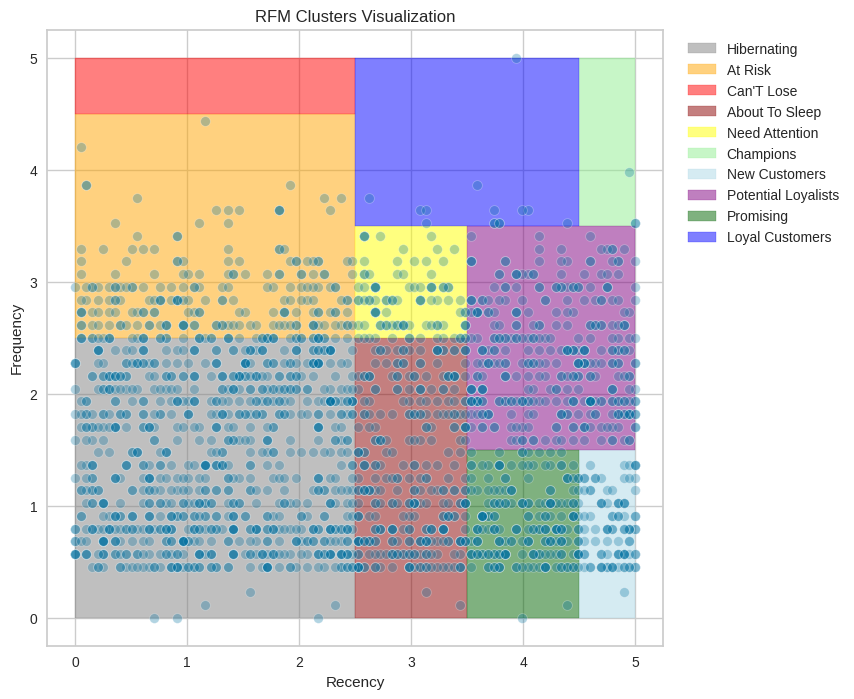

cut-off  cut-off-continous
Silhouette Score            0.464315           0.220945
Calinski-Harabasz Index  2343.549996        1607.885936
Davies-Bouldin Index        0.680291           1.011472

In [27]:
#Creating the cluster visualization and printing the scores



plt.figure(figsize=(10, 8))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}



# Plot the filled polygons for each segment
for segment, (x, y, color) in segments.items():
    plt.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

# Create a scatterplot of data points
sns.scatterplot(data=rfm, x='R', y='F', alpha=0.3)

# Set the aspect ratio to 'equal' to ensure the squares are not distorted
plt.gca().set_aspect('equal')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters Visualization')

# Display the plot
plt.show()
results_cutoff.head()

In [28]:
#The details on the segment distributions

# Assuming 'data' is your DataFrame and 'segment_variable' is the variable/column
segment_value_counts = rfm['segment'].value_counts()
total_count = len(rfm)

# Calculate the percentages
segment_percentages = (segment_value_counts / total_count) * 100

# Create a new DataFrame to display the results
percentage_table = pd.DataFrame({
    'Percentage': segment_percentages
})

# Sort the DataFrame by count in descending order
percentage_table = percentage_table.sort_values(by='Percentage', ascending=False)

print(percentage_table)


                     Percentage
at_Risk               16.853429
potential_loyalists   16.584491
loyal_customers       15.956970
hibernating           15.463918
about_to_sleep         8.202600
cant_loose             7.664724
champions              7.440610
new_customers          4.168534
promising              3.944420
need_attention         3.720305


## Kmeans

In the realm of customer segmentation and predictive modeling, the K-Means clustering algorithm emerges as a powerful tool for uncovering hidden patterns within the data. K-Means is a versatile unsupervised learning technique that can be employed to group similar customers into distinct clusters based on shared characteristics or behaviors.

At its core, K-Means seeks to partition the dataset into 'k' clusters, with each cluster representing a unique customer segment. The algorithm accomplishes this by iteratively assigning data points to the nearest cluster center and then recalculating the center based on the newly assigned points. This process continues until convergence, resulting in well-defined clusters that can offer valuable insights into customer behavior.

The four charts below showcase the elbow plot method of finding the ideal number of cluster, the k of k-means. The elbow chart, often referred to as the "elbow method" or "elbow curve," is a valuable tool in the realm of clustering analysis, particularly for determining the optimal number of clusters (k) in a K-Means clustering algorithm. The process involves running the K-Means algorithm on the dataset with varying values of k, starting from a small number and gradually increasing it. For each value of k, the algorithm computes the within-cluster sum of squares (WCSS), which measures the squared distances between data points and their cluster centroids. As you plot the values of k against WCSS, a distinctive pattern emerges. The key objective is to identify the "elbow point" on the graph, where the rate of WCSS decrease significantly changes, forming a distinct bend in the plot. This point signifies the optimal number of clusters, as it balances the desire for well-defined clusters (low WCSS) while maintaining practicality and interpretability. Typically, k is selected at or just before the elbow point, as further increasing clusters may lead to diminishing returns and overfitting, making the elbow chart an essential tool for cluster analysis.

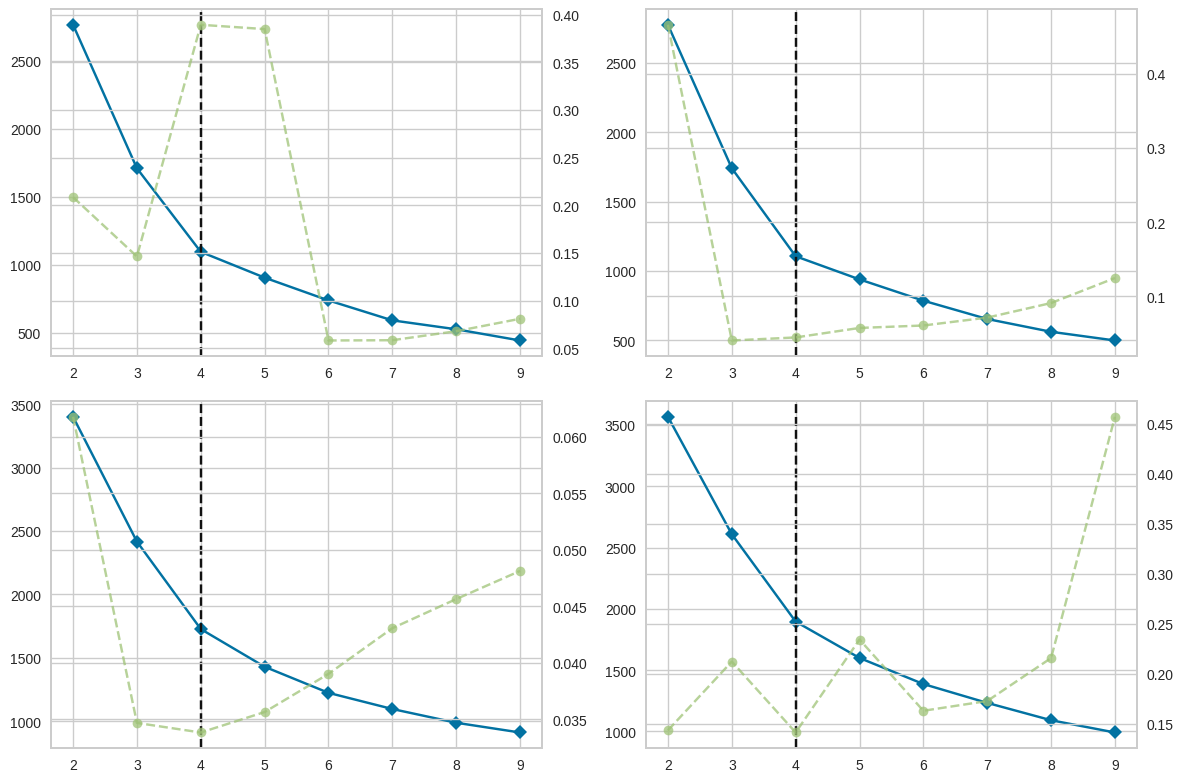

In [29]:
#Create the clusterings and visualize the elbow plot


# Convert scores to numeric format
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)

# Create the feature matrices x_bin and x_cont
X_RF_bin = rfm[['R_score', 'F_score']]
X_RF_cont = rfm[['R', 'F']] 
X_RFM_bin = rfm[['R_score', 'F_score',"M_score"]]
X_RFM_cont = rfm[['R', 'F',"M"]] 
#Scaling the feature matrices

scaler = StandardScaler()

# Fit and transform the scaler on each set of variables
X_RF_bin = scaler.fit_transform(X_RF_bin)
X_RF_cont = scaler.fit_transform(X_RF_cont)
X_RFM_bin = scaler.fit_transform(X_RFM_bin)
X_RFM_cont = scaler.fit_transform(X_RFM_cont)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Initialize the results dictionary
results = {}

# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["Binned RF", "Continuous RF", "Binned RFM", "Continuous RFM"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):
    
    ax_row, ax_col = ax_row_col
    
    # K-means clustering
    kmeans = KMeans(random_state=42,n_init=10)
    visualizer = KElbowVisualizer(kmeans, k=(2, 10), ax=axes[ax_row, ax_col])  # Pass the axis
    visualizer.fit(dataset)

    best_k = visualizer.elbow_value_
    kmeans = KMeans(n_clusters=best_k, random_state=42,n_init=10)
    kmeans.fit(dataset)

    rfm[f"{dataset_name}_kmeans_cluster"] = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])

    results[f"{dataset_name}_kmeans"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]

# Convert the results dictionary to a DataFrame for easier visualization
results_df = pd.DataFrame(results, index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
plt.tight_layout()
plt.show()  # Display the subplots


## K-Means Clusters Visualized

The visualizations presented below provide a comprehensive overview of our clustering analysis. In the foreground, you'll find data points color-coded to represent their cluster assignments, followed by a dataframe displaying the scores of selected metrics. Notably, K-Means clustering outperforms the previous cutoff method in capturing data patterns because it considers data point assignments to centroids. To summarize, the most favorable cluster configurations achieved through kmeans clustering methods are as follows:

- For the RF cutoff values, **4 clusters** are identified as optimal. ( &#8598; in chart)
- When considering the RF without cutoff values, the  **4 clusters** option emerges as the preferred choice. ( &#8599; in chart)
- In the case of RFM cutoff values, **4 clusters** are determined to be the best fit. ( &#8601; in chart)
- Finally, for RFM without cutoff values, **4 clusters** are adopted. ( &#8600; in chart)

To define these clusterings three types of visualizations are used along with the metric output. The first one plots the clusters on the RF map observed previously. This is mainly used for the RF clusterings but it is mentioned briefly as a projection of the RFM clusterings on the RF grid. The RFM clusterings should be observed primarily using the 3d plots which feature all of the three RFM dimensions and allow for interactivity in the form of observing the clusterings from different angles. Finally sunburst charts are used to show per cluster, which RF archetypes they contain. Finally, the before mentioned metrics for defining clustering quality are contained in a dataframe. 

### Overall assesment
Upon visual inspection of the clusters, it becomes evident that the top-left cluster configuration exhibits a superior division, substantiating the metric scores presented below. In all clusterings, the objective is to categorize customers based on recent and frequent purchase behaviors, resulting in groups that encompass those who buy both frequently and recently, those who do not buy frequently but have bought recently, those who buy frequently but not recently, and those who neither buy frequently nor recently. However, it's worth noting that all clusterings encounter challenges posed by outliers. This initial analysis highlights the need for further investigation into outlier handling strategies. One potential approach is to manually cluster outliers as either high or low-frequency purchasers and exclude them from the dataset. Alternatively, retaining outliers may be considered to prevent potential confusion for the model when encountering new observations with extreme values. Further examination is essential to make an informed decision.

### RF Clusterings

The top left clustering defines four clusters. Cluster 3 is located in the bottom left and takes the location of most of the "Hibernating" archetype. There are quite some outliers which show the expansion into the "At risk" archetype, something that looks like to be the domain of cluster 0. Cluster 0 finds its domain with the "At risk," "Can't lose," and "Loyal Customers" archetypes as its values increase along the "Frequency" axis. On the other side are clusters 1 and 2 which aim to divide the customers along the "Frequency" axis as well. Cluster 2 defines those that buy frequently, while cluster 1 defines those that do not buy frequently. As both define those clusters that have bought recently, they share the "Potential Loyalist" archetypes.

Score-wise, this clustering exhibits the highest silhouette score, suggesting that the clusters are well-separated and internally cohesive. Additionally, it boasts the highest Calinski-Harabasz score, indicating that there is a substantial difference in dispersion between the clusters, further reinforcing the quality and distinctiveness of the clustering results.

The top right cluster showcases the k-means clustering with un-binned RF variables. This clustering allows for a clearer cutoff between the recency and frequency. However, it does not react kindly to the outliers for higher values of either. Location/Archetype-wise, cluster 1 defines those consumers that have bought less recently, the "Hibernating" ones, and those that are "About to sleep" or even "At risk." Those that buy more frequently are defined through cluster 3. Cluster 3 consists mostly of those that are "At Risk" and those consumers that we "Can't Lose." To the right is cluster 0, defining those that have both bought recently and buy frequently. These are of the "Champions" archetype, "Loyal Consumers," or "Potential Loyalists." Finally, relatively higher recency and lower frequency define cluster 3.

It appears that the k-means algorithm slightly favors the binning of the RF variables, yielding only marginal improvements in performance. Apart from a modest improvement in the Davies-Bouldin index, the Silhouette and Calinski-Harabasz scores show only marginal declines in performance.

### RFM clusterings

Examining the RFM clustering within their RF clusters projection reveals their tendency to categorize customers into four distinct groups. However, when the "M" variable is introduced, the clusters appear less well-defined in the projection, a characteristic that is reflected in the metric scores. Indeed, when we assess the 3D plots for both the binned and continuous versions of the RFM variables, it becomes evident where K-means encounters challenges with outliers. Specifically, many observations situated a bit further from their primary cluster tend to be "swapped" between the nearest clusters. These particular observations exhibit a higher monetary value (represented by the M variables) than expected based on their recency and frequency scores.

Upon closer inspection of the metrics, it becomes evident that the K-means algorithm demonstrates a preference for the binned versions of the RFM variables. This preference is substantiated by significantly better scores in terms of silhouette, Calinski-Harabasz, and Davies-Bouldin, particularly when considering the context of RFM variables. Consequently, these binned versions result in clusters that are more distinct and internally cohesive.


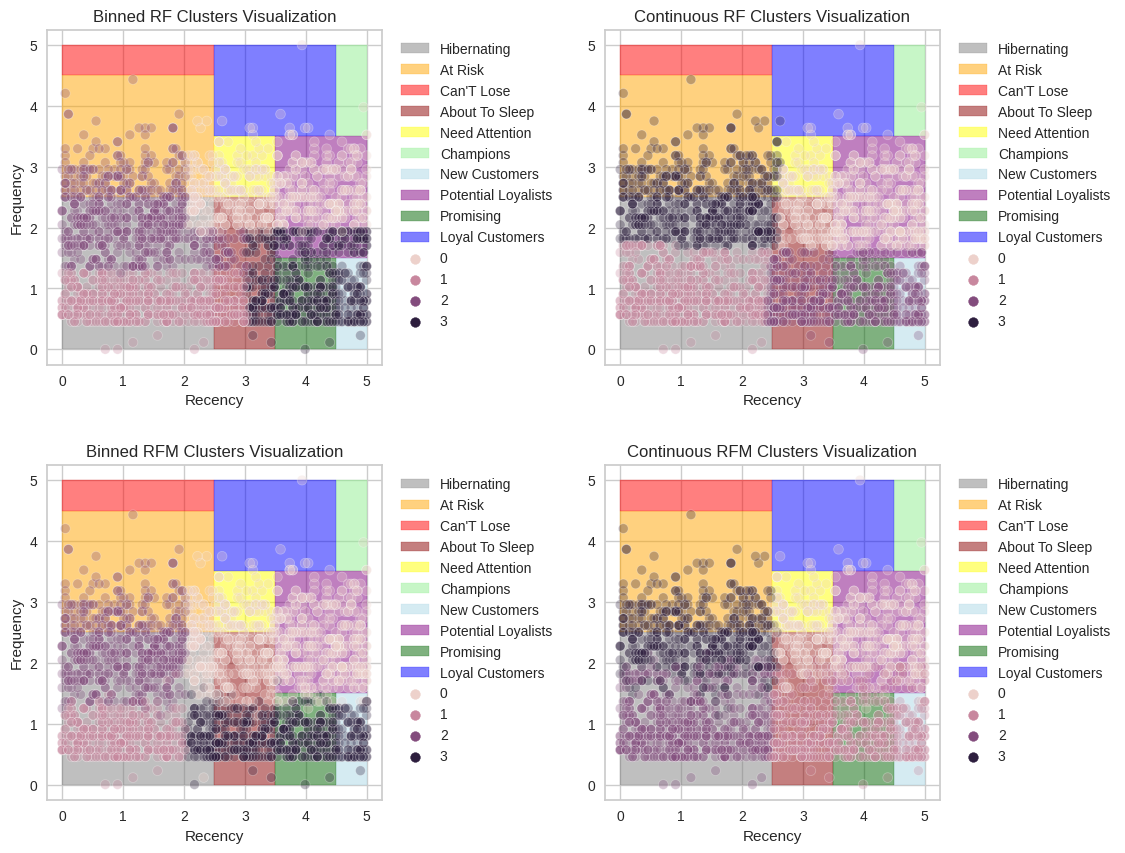

Binned RF_kmeans  Continuous RF_kmeans  Binned RFM_kmeans  \
Silhouette                 0.440882              0.420311           0.394133   
Calinski-Harabasz       2282.819523           2254.605885        2135.899067   
Davies-Bouldin             0.783274              0.768006           0.921167   

                   Continuous RFM_kmeans  
Silhouette                      0.377678  
Calinski-Harabasz            1878.256363  
Davies-Bouldin                  0.986629

In [30]:
# Convert scores to numeric format
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["Binned RF", "Continuous RF", "Binned RFM", "Continuous RFM"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=f"{dataset_name}_kmeans_cluster", alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()
#Show the score metrics:
results_df

In [31]:
#Visualizing the RFM plots in 3d

# Convert cluster labels to strings (or categorical data type)
rfm[f"Continuous RFM_kmeans_cluster"] = rfm[f"Continuous RFM_kmeans_cluster"].astype(str)
rfm[f"Binned RFM_kmeans_cluster"] = rfm[f"Binned RFM_kmeans_cluster"].astype(str)

# Create a figure for 3D plots with subplots
fig_3d = plt.figure(figsize=(24, 10))

# Define the number of 3D plots and their arrangement (side by side)
num_3d_plots = 2  # Number of 3D plots
plot_arrangement = (1, num_3d_plots)

# Create 3D subplots
for i, (dataset_name, dataset, is_3d) in enumerate(zip(
    ["Continuous RFM", "Binned RFM"],
    [X_RFM_cont, X_RFM_bin],
    [True, True],
)):

    # Create a 3D scatter plot with categorical cluster labels
    fig = px.scatter_3d(
        rfm,
        x='R',
        y='F',
        z='M',
        color=f"{dataset_name}_kmeans_cluster",
        opacity=0.5,  # Adjust opacity for smaller points
        size_max=1,  # Adjust the maximum marker size for smaller points
    )

    # Set the layout to enable interaction
    fig.update_layout(scene=dict(aspectmode="cube"))

  
    # Show the interactive plot in the notebook
    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

# Adjust layout for 3D plots
fig_3d.tight_layout()

# Show the 3D plots
plt.show()


<Figure size 2400x1000 with 0 Axes>

In [32]:
#Create a function to create the data format needed for the sunburst chart and run it
clusters=['Binned RF_kmeans_cluster', 'Continuous RF_kmeans_cluster',
       'Binned RFM_kmeans_cluster', 'Continuous RFM_kmeans_cluster']
def generate_comparison_data(df, clustering_algorithms, segment_column):
    cutoff_list = []
    segment_list = []
    cluster_list = []

    for segment_value in df[segment_column].unique():
        for clustering_algorithm in clustering_algorithms:
            for cluster_value in df[clustering_algorithm].unique():
                cutoff_list.append(segment_value)
                segment_list.append(clustering_algorithm)
                cluster_list.append(cluster_value)

    num_obs = []
    for i in range(len(cutoff_list)):
        segment = df[df[segment_column] == cutoff_list[i]]
        clustering = segment_list[i]
        cluster = segment[segment[clustering] == cluster_list[i]]
        count = len(cluster)
        num_obs.append(count)

    comparison = pd.DataFrame({'Algorithm': segment_list, 'CutoffSegment': cutoff_list, 'Cluster': cluster_list})
    comparison['ObservationCount'] = num_obs
    comparison = comparison.sort_values(by=['Algorithm', 'Cluster', 'CutoffSegment'])

    return comparison

comparison=generate_comparison_data(df=rfm, clustering_algorithms=clusters, segment_column="segment")

In [33]:
#create the sunburst charts, definition of the function and its output

def generate_sunburst_charts(comparison_df):
    # List of unique algorithm names
    unique_algorithms = comparison_df['Algorithm'].unique()

    for algorithm in unique_algorithms:
        subset_df = comparison_df[comparison_df['Algorithm'] == algorithm]
        fig = px.sunburst(
            subset_df,
            path=['Algorithm',  'Cluster','CutoffSegment'],
            values='ObservationCount',
            title=f'Sunburst Chart for Algorithm: {algorithm}'
            
        )
        fig.show()

# Example usage
generate_sunburst_charts(comparison)  


**Please note that the sunburst chart is a visualization tool commonly used to represent hierarchical data structures. In our analysis, we employ sunburst charts to compare the RFM archetypes with the outcomes generated by the clustering algorithms. These charts offer a visual breakdown of how customers are segmented into various clusters, shedding light on the relationships and hierarchies within the data. This visualization helps us understand how well the clustering aligns with the RFM archetypes and provides valuable insights into customer behavior and segmentation.**

In [34]:
#Saving the clustering results
#SegmentationFinal['Binned RF_kmeans_cluster']=rfm['Binned RF_kmeans_cluster']
#SegmentationFinal['Binned RFM_kmeans_cluster']=rfm['Binned RFM_kmeans_cluster']

#SegmentationFinal.head()

# Hierarchical clustering

This clustering method is specific in the way that it starts with each datapoint being its own cluster. Each of these clusters is then gradually merged depending on how close it is to the other clusters. This continues until all of the data points are in a single cluster. Depending on the distance metric, the analyst can then control the number of clusters. The exact method of defining how a cluster is made is called the linkeage. In this analysis we will be using the single, complete, average, and ward linkeage.
The single linkeage defines the distance between clusters as the minimum distance between any two observations. 
Complete linkeage is the opposite of single linkeage and defines the distance as the maximum distance between two points.
Average linekage, as the name implies, takes the average distance between all of the data points.
Wards linkeage uses euclidean distance and tries to minimize the cluster variance when combining clusters.

Dendrograms, visual depictions of hierarchical clustering, serve as insightful tools by illustrating how data points form clusters. The vertical axis signifies dissimilarity, with branches merging at varying heights, portraying cluster amalgamations. The horizontal axis represents individual data points. Connective lines indicate where clusters merge, and branching patterns reflect relationships—short branches suggest similarity, while longer ones indicate greater dissimilarity. Selecting a cutoff on the vertical axis establishes clusters, with vertical lines extending to the horizontal axis denoting cluster counts. Interpretation involves assigning labels, and nested structures unveil hierarchical associations. Overall, dendrograms provide a visual avenue for exploring data groupings, facilitating insights and exploration.


### Exploring Hierarchical Clustering with Binned RF Values

Within the realm of the complete linkage method, discernible cluster arrangements come to light at specific distance thresholds. Notably, a distance of 2.5 yields a clustering solution characterized by 4 distinct clusters. Likewise, a distance of 1.8 corresponds to a scenario encompassing 8 clusters, while a distance of 1.3 leads to the emergence of a 9-cluster configuration. Shifting our attention to the average linkage method, the most suitable cluster counts manifest as 4 and 8, with their respecive distances being 1.5, and 1.0. The dendrogram generated using the Ward linkage method suggests a range of optimal cluster counts. Specifically, this method prompts consideration of configurations involving 4 and 8 clusteres at the 3.0 and 1.5 distances.

The exploration of these diverse linkage methods and their associated cluster counts provides valuable insights into the underlying structure of the data, enabling informed decision-making in the realm of hierarchical clustering.

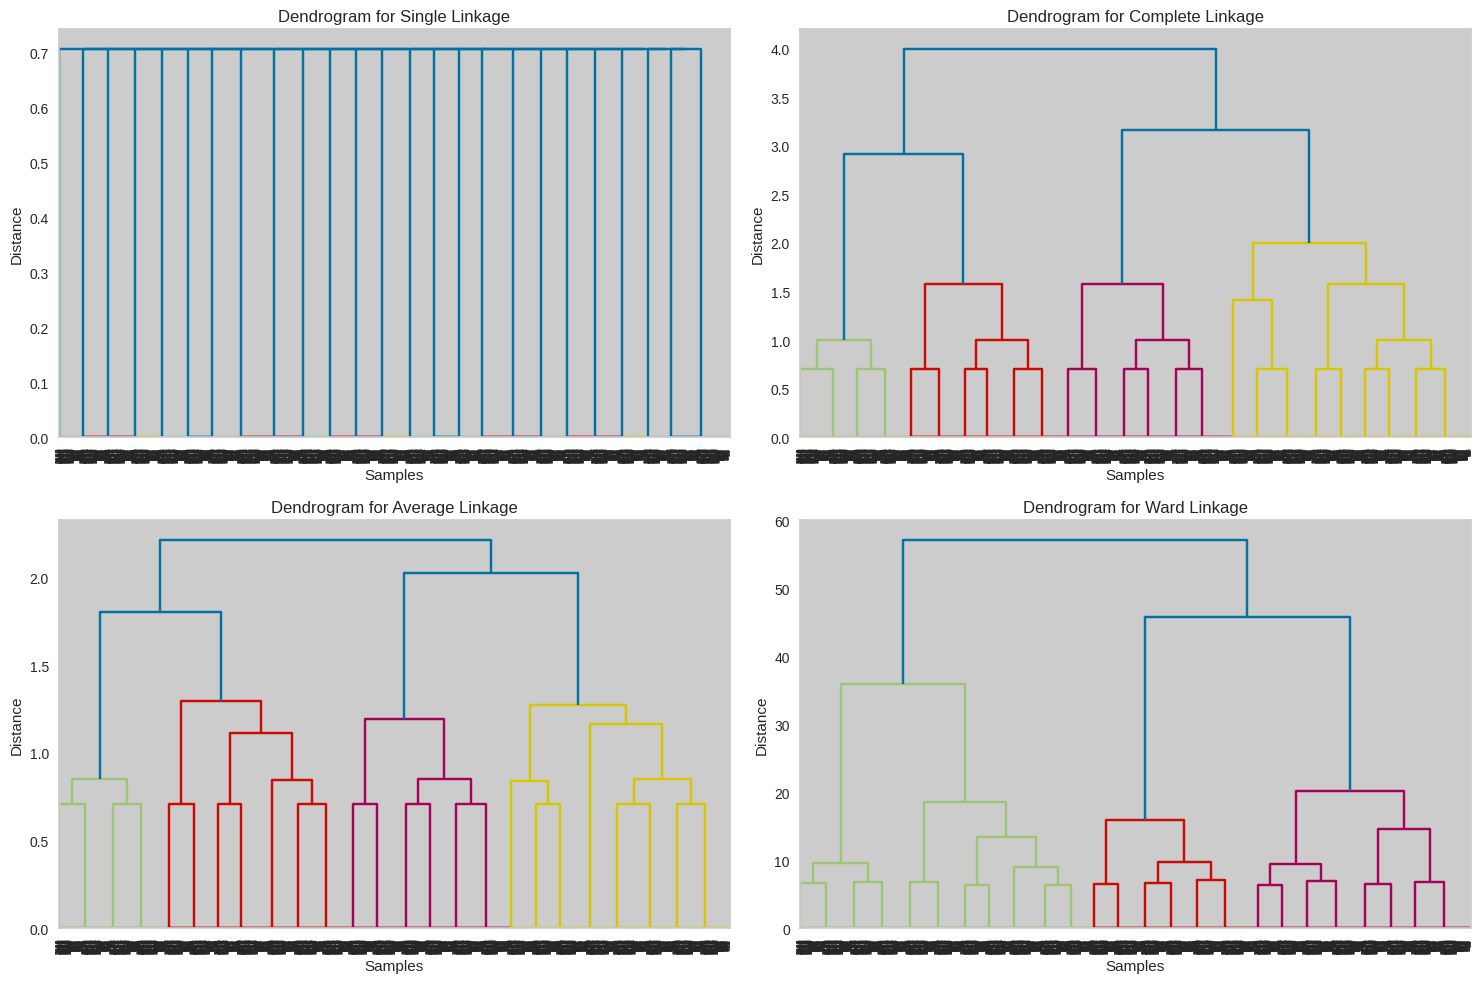

In [35]:
## Hierarchical clustering with RF binned values


methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RF_bin, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


Presented below are the evaluation results encompassing the Silhouette Score, Calinski-Harabasz index, and Davies-Bouldin index for the RF segmentation conducted using binned values. Within the context of these metrics, the Complete linkage method with 9 clusters emerges as a standout performer, boasting the highest Silhouette Score along with the most favorable Calinski-Harabasz index. The compelling combination of these metrics underscores the potential effectiveness of this configuration.

The prominence of the 9-cluster solution under the Complete linkage method can be attributed to its ability to emphasize distinctiveness between clusters. However, it's noteworthy that the larger number of clusters introduces a heightened likelihood of overlap, which in turn contributes to the relatively elevated Davies-Bouldin index. This outcome serves as an illustrative example of the delicate balance between maximizing silhouette scores and mitigating overlap.

Shifting our focus to the Average method, the 9-cluster alternative demonstrates commendable metrics, aligning closely with the outcomes of the Complete linkage approach. Notably, this 9-cluster configuration exhibits a lower Silhouette Score and a reduced Davies-Bouldin index, signifying clusters that are somewhat less dense yet notably less susceptible to overlapping. This nuanced trade-off underscores the intricate interplay between cluster density and overlap.

Encouragingly, the Ward method also highlights the 9-cluster solution as a top contender, mirroring the density characteristics of the Complete linkage method while exhibiting a comparable propensity for overlap. As such, the 9-cluster choice emerges as an appealing candidate across multiple linkage methods.
In light of these insights, our selection falls upon the 9-cluster option utilizing the Complete linkage method. This decision is substantiated by its impressive Silhouette Score and closely comparable characteristics in terms of overlap and potential cluster misclassification. This choice strikes a harmonious balance between maximizing distinctiveness and minimizing the risk of overlap, aligning well with the overarching goals of the RF segmentation analysis using binned values.

In [36]:
#Differentiating agglomerative clusters, RF with binned values
print("*"*50)
print("Differentiating agglomerative clusters, RF with binned values")
print("*"*50)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [4,8],
    'average': [4, 9],
    'ward': [4,8]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RF_bin)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_bin, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RF_bin, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RF_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RF with binned values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 4
Silhouette Score: 0.4344
Calinski-Harabasz index: 2230.6150
Davies-Bouldin index: 0.7509
-----------------------
Clusters: 8
Silhouette Score: 0.4681
Calinski-Harabasz index: 2458.0442
Davies-Bouldin index: 0.8170
-----------------------
Linkage Method: Average
-----------------------
Clusters: 4
Silhouette Score: 0.4295
Calinski-Harabasz index: 2168.7946
Davies-Bouldin index: 0.7868
-----------------------
Clusters: 9
Silhouette Score: 0.4714
Calinski-Harabasz index: 2467.6744
Davies-Bouldin index: 0.7399
-----------------------
Linkage Method: Ward
-----------------------
Clusters: 4
Silhouette Score: 0.4235
Calinski-Harabasz index: 2163.5557
Davies-Bouldin index: 0.7744
-----------------------
Clusters: 8
Silhouette Score: 0.4538
Calinski-Harabasz index: 2347.67

## Exploring hierarchical clustering with RF continuous values

The dendrograms depicted below provides insight into potential cutoff points and the corresponding number of clusters for each linkage method. he dendrogram visual below provides a clear overview of possible segmentation breakpoints and their corresponding cluster counts for each linkage method. 
Shifting our attention to the complete linkage approach, we identify clusters forming at distances of 2.8 and 3. These distances yield 4, 8 clusters, respectively. In contrast, the average linkage method introduces a different set of possibilities. At distances of 1.5 and 1.3, 5 and 12 clusteres emerge. Finally, observing the Ward linkeage, the ideal cluster numbers seem to be at the distance of 30 and 15, with 4 and 7 clusters respectively.

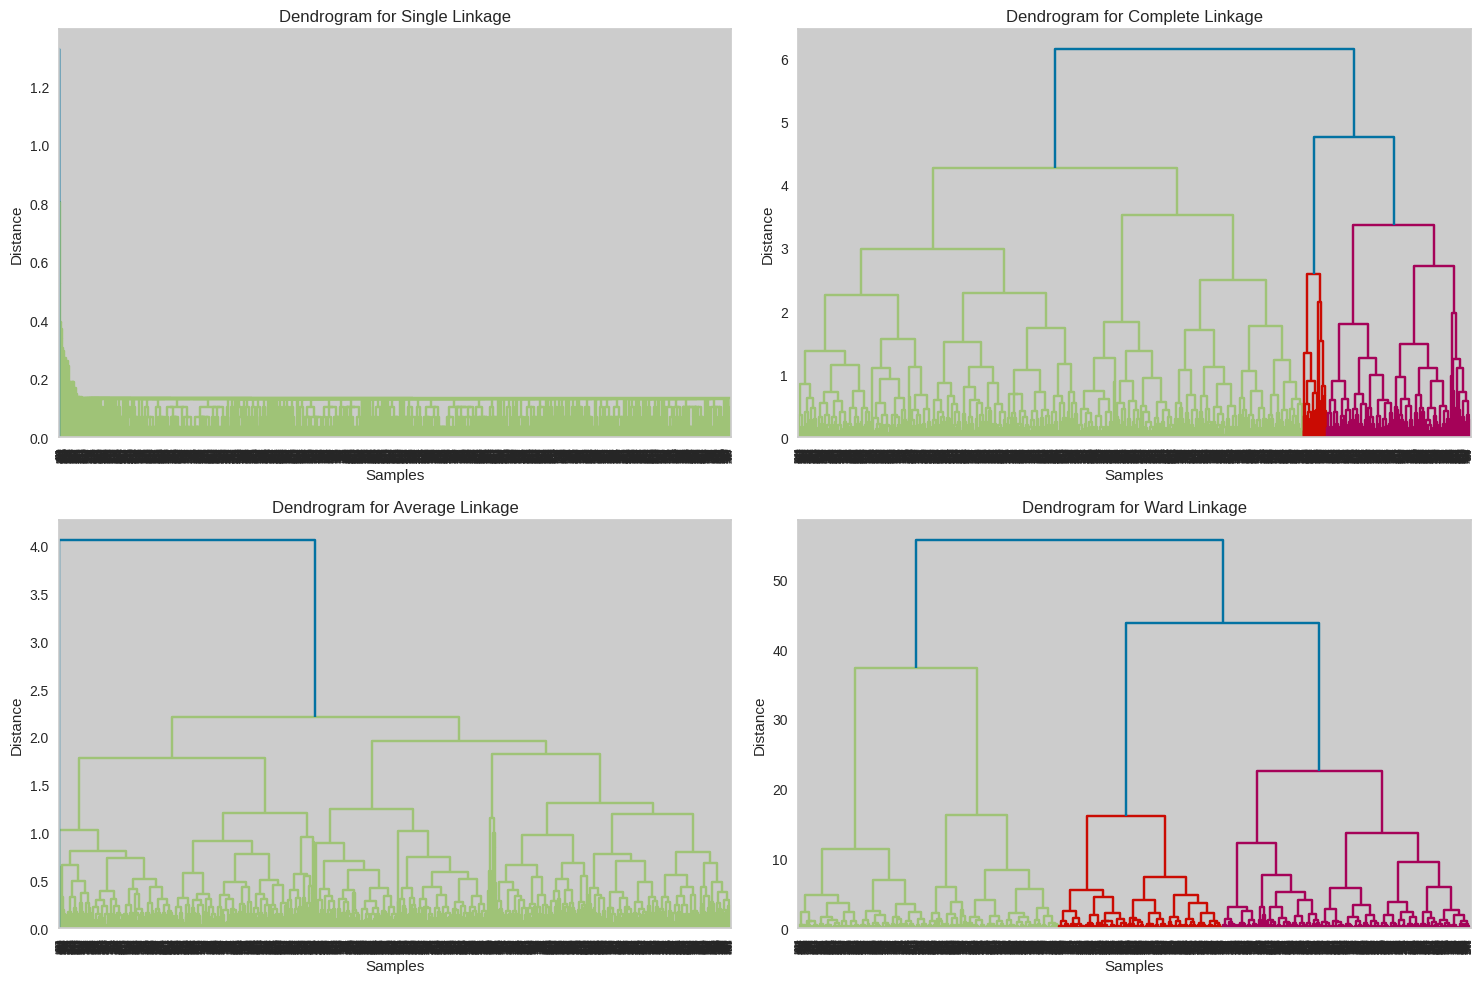

In [37]:
## Hierarchical clustering with RF continuous values


methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RF_cont, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


Comparing the results, it's evident that the linkage method with 2 segments outperforms the one with 3 segments in all metrics. The 2-segment option showcases stronger scores across the board—its clusters are more compact, exhibit greater inter-cluster distance, and have reduced overlap. When juxtaposed with the average linkage method, the 2-segment complete linkage method boasts a higher silhouette score and superior Calinski-Harabasz index. In contrast, the average linkage method yields clusters with minimal overlap, promoting improved decision-making through more precise resource allocation, reduced segmentation uncertainty, and easier interpretation. The decision between these solutions hinges on the objectives and analytical context. Opting for the first solution might be ideal if creating well-defined segments for targeted marketing or decision-making is paramount, given its superior silhouette score and CH index. On the other hand, if the focus is on ensuring distinct cluster separation to address concerns about misclassification and overlap, the second solution—with a stronger DB index—might offer a more appropriate fit. For the scope of this analysis, where no specific priority has been established, a preference will be given to the 2/3 segmentation approach. In this context, the complete linkage method with two clusters will be selected for further comparison but significant disparities between future options will influence future selections.

In [38]:
#Differentiating agglomerative clusters, RF with continous values
print("*"*50)
print("Differentiating agglomerative clusters, RF with continoous values")
print("*"*50)




# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [4, 8],
    'average': [5,12],
    'ward': [4,7]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RF_cont)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_cont, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RF_cont, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RF_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RF with continoous values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 4
Silhouette Score: 0.2435
Calinski-Harabasz index: 988.4025
Davies-Bouldin index: 1.0156
-----------------------
Clusters: 8
Silhouette Score: 0.2951
Calinski-Harabasz index: 1344.3804
Davies-Bouldin index: 0.8858
-----------------------
Linkage Method: Average
-----------------------
Clusters: 5
Silhouette Score: 0.3089
Calinski-Harabasz index: 827.4873
Davies-Bouldin index: 0.7671
-----------------------
Clusters: 12
Silhouette Score: 0.3165
Calinski-Harabasz index: 1385.2714
Davies-Bouldin index: 0.7625
-----------------------
Linkage Method: Ward
-----------------------
Clusters: 4
Silhouette Score: 0.3808
Calinski-Harabasz index: 1884.9510
Davies-Bouldin index: 0.8090
-----------------------
Clusters: 7
Silhouette Score: 0.3343
Calinski-Harabasz index: 1846

## Exploring hieararchical clustering with RFM binned values
The complete linkage method presents a set of intriguing clustering choices at specific distances. Notably, distances of 3 and 2 correspond to cluster counts of 6 and 13 respectively. Meanwhile, the average linkage method suggests cluster formations at distances of 1.7 and 1.3 resulting in cluster counts of 5 and 11 respectively. The Ward linkage method produces cluster configurations at distances of 30 and 20, yielding cluster counts of 4 and 6 respectively.

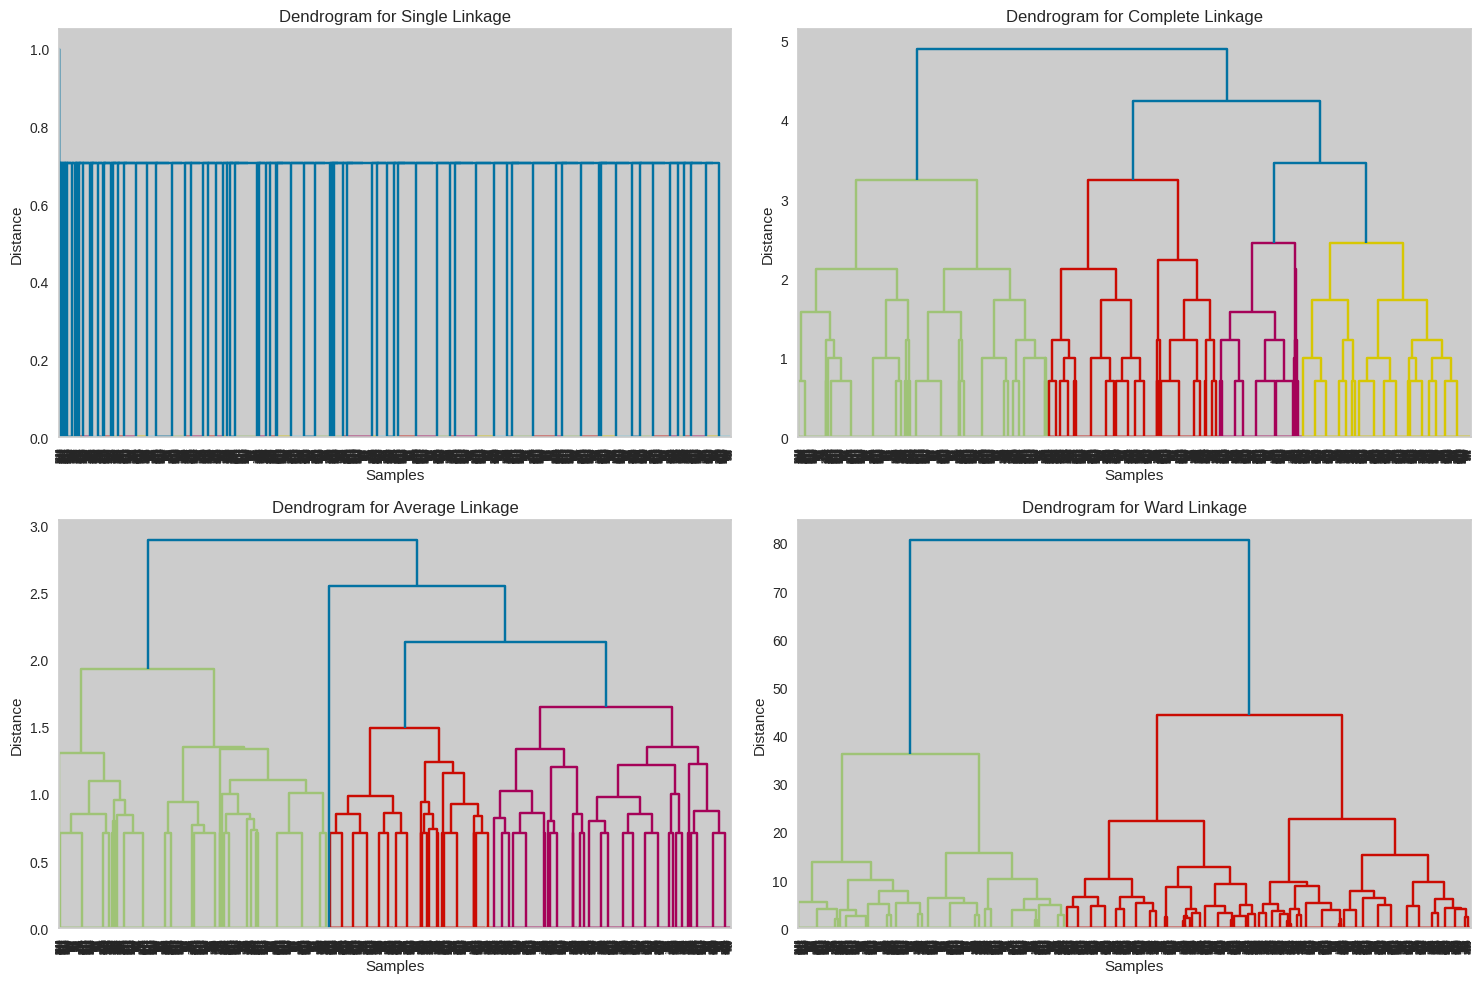

In [39]:
## Hierarchical clustering with RFM binned values


methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RFM_bin, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


The analysis of RFM binned values indicates a preference for fewer clusters, with the scenario involving two clusters showcasing the highest silhouette score among all alternatives. Upon comparing the Ward and average linkage methods, both of which exhibit better silhouette scores in comparison to the complete method, a noteworthy observation emerges. The Ward linkage method not only provides a superior Davies-Bouldin index but also outperforms in terms of the Calinski-Harabasz index. This combination implies a clustering solution characterized by improved cluster separation and reduced overlap. As such, we select the Ward linkeage method with two clusters. 

In [40]:
#Differentiating agglomerative clusters, RFM with binned values
print("*"*50)
print("Differentiating agglomerative clusters, RFM with binned values")
print("*"*50)




# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [6, 13],
    'average': [5,11],
    'ward': [4,6]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RFM_bin)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_bin, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_bin, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RFM_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RFM with binned values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 6
Silhouette Score: 0.3120
Calinski-Harabasz index: 1669.1832
Davies-Bouldin index: 1.0822
-----------------------
Clusters: 13
Silhouette Score: 0.2539
Calinski-Harabasz index: 1101.7844
Davies-Bouldin index: 1.2000
-----------------------
Linkage Method: Average
-----------------------
Clusters: 5
Silhouette Score: 0.3718
Calinski-Harabasz index: 1527.7281
Davies-Bouldin index: 0.8340
-----------------------
Clusters: 11
Silhouette Score: 0.3409
Calinski-Harabasz index: 1355.9613
Davies-Bouldin index: 0.9844
-----------------------
Linkage Method: Ward
-----------------------
Clusters: 4
Silhouette Score: 0.3728
Calinski-Harabasz index: 2001.8806
Davies-Bouldin index: 0.9795
-----------------------
Clusters: 6
Silhouette Score: 0.3505
Calinski-Harabasz index: 1838

## Exploring hieararchical clustering with RFM continous values

The following dendrograms present a variety of intriguing clustering possibilities using the continuous values of the RFM clustering method. Complete linkage clustering reveals four distinct options, yielding cluster counts of 5, 11, and 4 at respective distances of 4, 3.5, and 3. The Ward linkage method provides three distinct options at distances of 40, 30, 20 resulting in cluster counts of 3, 4, and 8 respectively. The average linkeage did not provide a conclusive number of clusters.

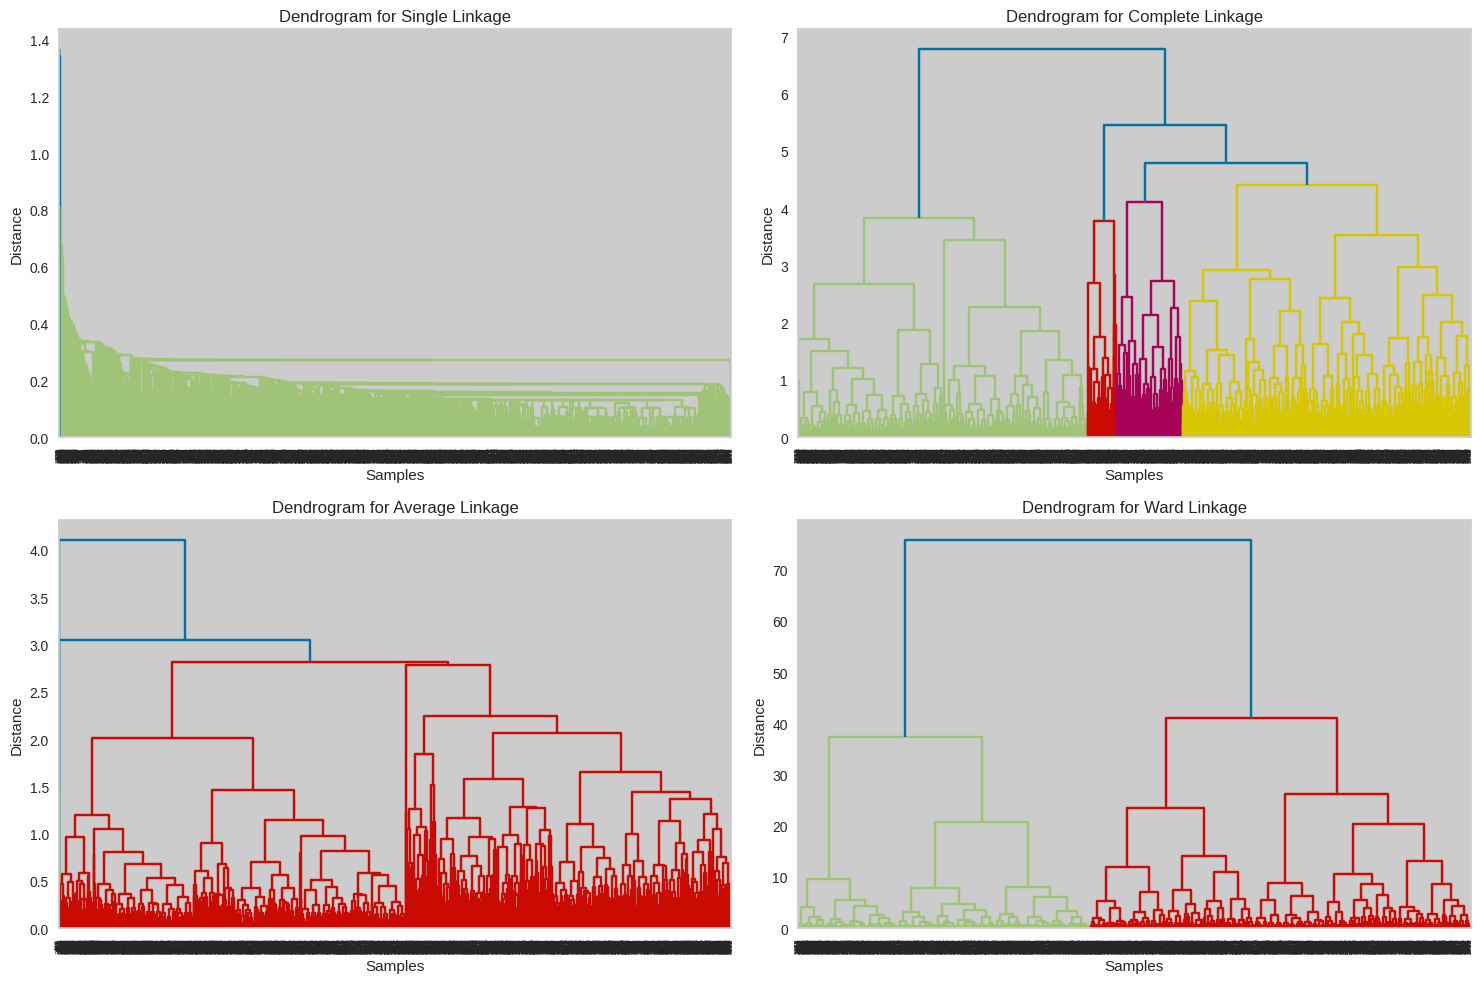

In [41]:
## Hierarchical clustering with RFM continuous values

methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RFM_cont, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


The silhouette scores experience an enhancement with the introduction of four clusters, but the silhouette score diminishes for each subsequent cluster when considering the complete linkage option. Interestingly, all configurations for this linkage method result in Davies-Bouldin indices that surpass the typical threshold of 1.Comparatively, the average linkage method demonstrates improvement over complete linkage, with Davies-Bouldin index values that, while still significant, are not as unfavorable. Remarkably, the silhouette scores decline as the number of clusters increases, and the Calinski-Harabasz index exhibits variability. For the Ward linkage method, the scenario with two clusters boasts the highest silhouette score among the presented options. However, as the number of clusters increases, the silhouette score and other associated metrics decrease. 

For this solution we select the ward linkeage with four clusters

In [42]:
#Differentiating agglomerative clusters, RFM with continus values
print("*"*50)
print("Differentiating agglomerative clusters, RFM with continous values")
print("*"*50)




# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [5, 11, 14],
    'ward': [3,4,8]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RFM_cont)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_cont, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_cont, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RFM_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RFM with continous values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 5
Silhouette Score: 0.2469
Calinski-Harabasz index: 862.6584
Davies-Bouldin index: 1.2446
-----------------------
Clusters: 11
Silhouette Score: 0.2778
Calinski-Harabasz index: 940.6777
Davies-Bouldin index: 1.0435
-----------------------
Clusters: 14
Silhouette Score: 0.2891
Calinski-Harabasz index: 874.6694
Davies-Bouldin index: 1.0078
-----------------------
Linkage Method: Average
-----------------------
Linkage Method: Ward
-----------------------
Clusters: 3
Silhouette Score: 0.3333
Calinski-Harabasz index: 1389.6869
Davies-Bouldin index: 1.1927
-----------------------
Clusters: 4
Silhouette Score: 0.3187
Calinski-Harabasz index: 1433.7933
Davies-Bouldin index: 1.0522
-----------------------
Clusters: 8
Silhouette Score: 0.3043
Calinski-Harabasz index: 1389

## Optimal Clusters from Agglomerative Clustering

To summarize, the most favorable cluster configurations achieved through agglomerative clustering methods are as follows:

- For the RF cutoff values, the **complete linkage** method with **9 clusters** is identified as optimal. ( &#8598; in chart)
- When considering the RF without cutoff values, the **complete linkage** method with **2 clusters** emerges as the preferred choice. ( &#8599; in chart)
- In the case of RFM cutoff values, the **ward linkage** method with **2 clusters** is determined to be the best fit. ( &#8601; in chart)
- Finally, for RFM without cutoff, the **ward linkage** method with **4 clusters** is adopted. ( &#8600; in chart)

The RF with Cutoff Clustering method revealed nine distinct clusters with commendable metric scores. These clusters exhibit clear boundaries, as indicated by a high silhouette score of 0.48. Additionally, the Calinski-Harabasz index, standing at 2497, highlights the remarkable separation between clusters. A Davies-Bouldin score of 0.75, while not perfect, is quite acceptable.
Delving into the archetypal composition of these clusters unveils an intriguing narrative. "Potential loyalists" are scattered across clusters 1, 6, and 5. Within these clusters, we find a mix of adjacent archetypes, such as "Champions," "Need Attention," and "Can't Lose." Cluster 0 and cluster 2 share a similar composition, with the former housing customers classified as "Hibernating" and "About to Sleep," and the latter exclusively comprising those who have "Hibernated."
Cluster 3 presents a diverse blend of archetypes: "Potential Loyalists," "Promising," and "New Customers." This cluster sheds light on newer customers and their various paths to positive outcomes. Finally, several clusters are distinctly characterized by a single archetype: cluster 7 with "Potential Loyalists," cluster 8 with "Can't Lose," and cluster 4 hosting "At Risk" customers.


In contrast, the RFM without Cutoff Clustering approach yields four clusters, though it faces challenges in distinguishing between certain archetypes. For instance, cluster 0 comprises primarily "Hibernating" and "About to Sleep" customers. However, it also includes archetypes on opposite ends of the spectrum, encompassing both those "At Risk" and "Needing Attention" and those labeled as "Potential Loyalists" and "Promising."
Clusters 1 and 2 encounter similar issues, as they both consist of "Loyal Customers" but represent different paths. Cluster 1 leans positively, suggesting the transformation of "Loyal Customers" into "Champions." In contrast, cluster 2 hints at a transition towards the "At Risk" archetypes.
Visually, these clusters categorize customers into four distinct groups: recent and frequent buyers, recent but infrequent buyers, non-recent but frequent buyers, and non-recent and infrequent buyers. While these clusters exhibit strong silhouette scores (0.43), they grapple with a higher Davies-Bouldin index (0.85), indicating some confusion between the mentioned archetypes.

To summarize both the RF without cutoff cluster and RFM with cutoff cluster visualization, even though the scores are good, this clustering is necessarily bad as it simplifies the problem too much. The top right clustering basically divides the customers into either buying recently or not buying recently, while the RFM with cutoff clustering option (bottom left) defines them as either buying frequently or not. As such, these clusterings will not be used. 

In conclusion, the selected cluster for further analysis is the RF clustering with cutoff created using complete linkeage and 9 clusters.

In [43]:
#Comparing the top clusters produced by agglomerative clustering

#instantiating the results_df to hold the metrics:
results_df = pd.DataFrame(index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

for dataset_name, dataset, clustering in zip(["Binned RF", "Continuous RF", "Binned RFM", "Continuous RFM"],
                                            [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                             [("complete",9),("complete",2),("ward",2),("ward",4)]):
    linkage, n_clusters = clustering
    if linkage == "ward":
        hc=AgglomerativeClustering(n_clusters=n_clusters, linkage=str(linkage))
    else:
        hc=AgglomerativeClustering(n_clusters=n_clusters, linkage=str(linkage))
    
    rfm[f"{dataset_name}_agg_clustering"] = hc.fit_predict(dataset)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    #Transfering the results to the dataframe
    results_df[f"{dataset_name}_agg"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]



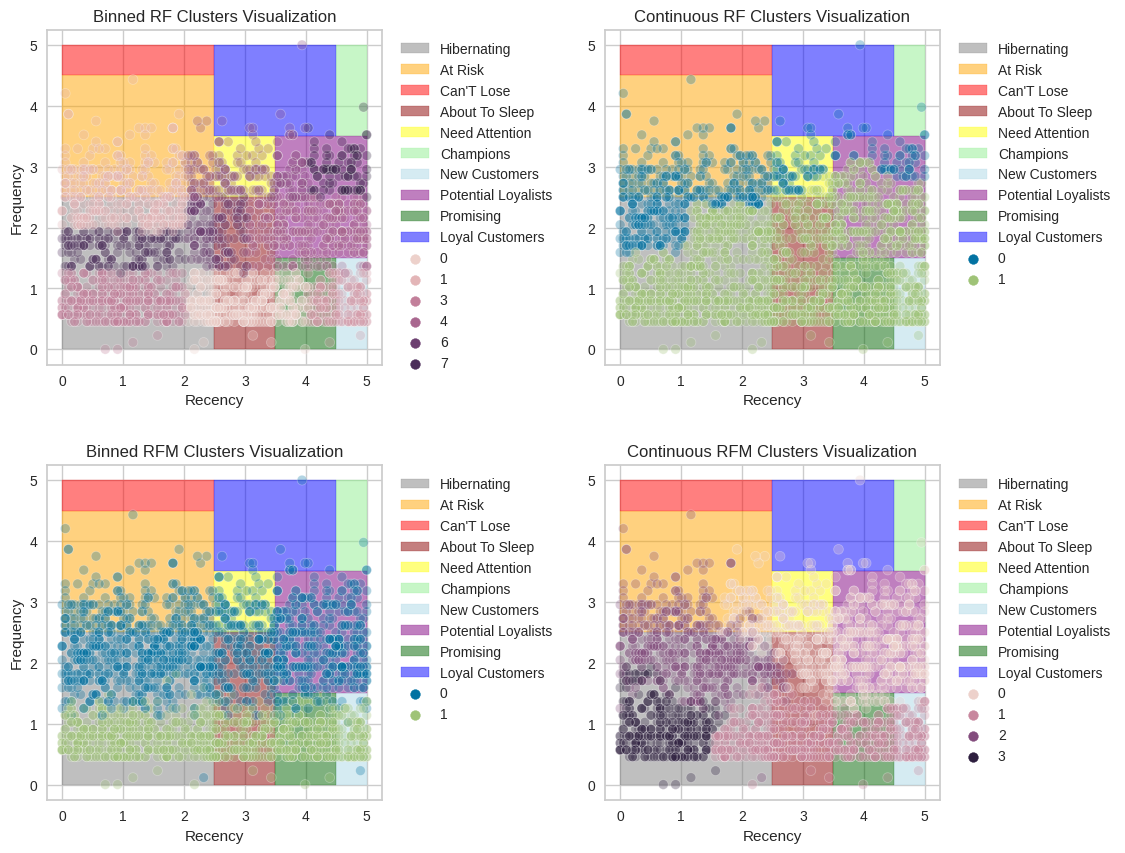

Binned RF_agg  Continuous RF_agg  Binned RFM_agg  \
Silhouette              0.479090           0.285082        0.428807   
Calinski-Harabasz    2497.816474         832.391605     2106.078945   
Davies-Bouldin          0.749921           1.239500        0.939413   

                   Continuous RFM_agg  
Silhouette                   0.318678  
Calinski-Harabasz         1433.793323  
Davies-Bouldin               1.052182

In [44]:
#Produce the clustering visualization and print out the scores


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["Binned RF", "Continuous RF", "Binned RFM", "Continuous RFM"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=f"{dataset_name}_agg_clustering", alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()

results_df

In [45]:
#Generate data needed for the sunburst charts and produce the sunburst charts:
clusters=["Binned RF_agg_clustering", "Continuous RF_agg_clustering", "Binned RFM_agg_clustering", "Continuous RFM_agg_clustering"]
comparison=generate_comparison_data(df=rfm, clustering_algorithms=clusters, segment_column="segment")
generate_sunburst_charts(comparison)

In [46]:
#saving the selected cluster

#SegmentationFinal['RF with Cutoff_agg_clustering']=rfm['RF with Cutoff_agg_clustering']
#SegmentationFinal.head()

## Mean shift

he Mean Shift algorithm is a powerful clustering technique that operates by identifying dense regions within a given dataset. Unlike some other clustering methods, Mean Shift excels in detecting clusters with irregular and non-linear shapes. This unique ability makes it particularly well-suited for scenarios where traditional methods might struggle to accurately capture the underlying structures.

One of the most distinctive features of the Mean Shift algorithm is its non-parametric nature. This means that the algorithm doesn't assume a fixed number of clusters in advance, unlike methods such as k-means. Instead, it relies on a crucial parameter known as the "bandwidth." This bandwidth essentially determines the radius of the circular region around each data point within which the algorithm searches for dense regions. The bandwidth parameter plays a significant role in the algorithm's behavior. A smaller bandwidth leads to smaller search regions, resulting in more fine-grained clustering. Conversely, a larger bandwidth can lead to larger clusters that encompass more data points. 

The process begins by selecting a starting data point and then iteratively shifting it towards higher density areas. The movement is guided by the local density gradient, and the data point effectively climbs towards the peak of a density hill. This hill-climbing behavior continues until convergence is achieved, at which point the algorithm has identified a mode of the underlying density distribution. Each mode corresponds to a cluster center.

### Mean shift output

In the context of the Mean Shift algorithm, we conducted an exploration using a range of bandwidth values, spanning from 1 to 3 in increments of 0.5. As with previous algorithms, we also use different versions of the dataset for experimentation.

For the RF binned dataset, we discovered that a bandwidth of 2.5 yielded the most favorable clustering outcome. At this bandwidth, the silhouette score reached a notable 0.43, the Calinski-Harabasz index stood at 2050, and the Davies-Bouldin index attained a value of 0.85. 
However, when we applied the Mean Shift algorithm to the RF dataset containing continuous values, the results were less promising. The silhouette score for this dataset was merely 0.26, indicating that the algorithm struggled to find meaningful cluster structures. The corresponding Calinski-Harabasz index scored 1340, while the Davies-Bouldin index reached 0.86. Unfortunately, these scores did not inspire confidence in the clustering quality. Shifting our focus to the RFM binned dataset, we observed that this algorithm performed exceptionally well. The dataset achieved a silhouette score of 0.52, indicating a strong clustering structure. The Calinski-Harabasz index and Davies-Bouldin index also yielded impressive scores, highlighting the overall quality of the clustering. However, it's worth noting that the number of resulting clusters was relatively high, with 26 clusters detected. In contrast, the RFM dataset with continuous values did not exhibit the same level of success. The highest silhouette score achieved was a modest 0.36, suggesting that the algorithm struggled to establish distinct clusters within the data. 

In conclusion, despite the seemingly intricate configuration of 26 clusters identified by the RFM binned dataset using a bandwidth of 1, this algorithm remarkably yields the highest silhouette score. Thus, it stands as the most compelling choice to showcase to the managers.

In [47]:
# Mean shift RF binned


#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RF_bin)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    
    unique_labels = len(np.unique(labels))
    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_bin, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RF_bin, labels)
        davies_bouldin_index = davies_bouldin_score(X_RF_bin, labels)
        
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 4 clusters.
Silhouette Score: 0.4409
Calinski-Harabasz index: 2282.8195
Davies-Bouldin index: 0.7833
-----------------------
Bandwidth: 1.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [48]:
# Mean shift RF continous


#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RF_cont)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_cont, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RF_cont, labels)
        davies_bouldin_index = davies_bouldin_score(X_RF_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 4 clusters.
Silhouette Score: 0.3220
Calinski-Harabasz index: 1132.0258
Davies-Bouldin index: 0.9368
-----------------------
Bandwidth: 1.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [49]:
# Mean shift RFM binned


#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RFM_bin)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_bin, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_bin, labels)
        davies_bouldin_index = davies_bouldin_score(X_RFM_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 7 clusters.
Silhouette Score: 0.3409
Calinski-Harabasz index: 1725.2932
Davies-Bouldin index: 1.0344
-----------------------
Bandwidth: 1.5
This bandwidth found 2 clusters.
Silhouette Score: 0.4198
Calinski-Harabasz index: 2077.4527
Davies-Bouldin index: 0.9735
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [50]:
# Mean shift RFM continous


#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RFM_cont)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_cont, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_cont, labels)
        davies_bouldin_index = davies_bouldin_score(X_RFM_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 7 clusters.
Silhouette Score: 0.3048
Calinski-Harabasz index: 1100.3032
Davies-Bouldin index: 0.9909
-----------------------
Bandwidth: 1.5
This bandwidth found 2 clusters.
Silhouette Score: 0.4041
Calinski-Harabasz index: 1844.9324
Davies-Bouldin index: 1.0008
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


## Visualization mean shift

The results of the best clusterings mean-shift produced are visualized below, along with their full scores. 

- For the RF cutoff values, the **bandwidth of 1.5** discovered **5** clusters ( &#8598; in chart)
- When considering the RF without cutoff values, the **bandwidth of 1.0** discovered **6 clusters**  ( &#8599; in chart)
- In the case of RFM cutoff values, the **bandwidth of 1.0** produced **24 clusters**  ( &#8601; in chart)
- Finally, for RFM without cutoff, with a  **bandwidth of 3** found **3 clusters** ( &#8600; in chart)

The most promising clustering result, based on the evaluation scores, is undoubtedly the clustering derived from the RF dataset with the cutoff values. It boasts a silhouette score of 0.46, a Calinski-Harabasz score of 2042, and a Davies Bouldin score of 0.84. Examining its structure reveals that "Hibernating" and "At risk" archetypes closely coexist within the same cluster. To the right of this cluster, we find cluster 2, which attempts to encompass various archetypes, primarily consisting of "Potential Loyalists" and "About to Sleep," but also exhibiting elements of "Promising" and "New Customers." Cluster four is home to customers belonging to the "At risk" and "Can't lose" archetypes. Finally, clusters 1 and 3 divide the "Loyal Customers" archetype between them, with each cluster additionally containing "Need Attention" and "Champions," respectively.

Shifting our focus to the top right, the RF dataset without cutoff and its best mean-shift clustering present a suboptimal result. The silhouette score falls below 0.3, and the Davies-Bouldin score approaches 0.92, indicating an ill-defined, scattered clustering with multiple clusters overlapping. In the bottom right clustering, we identify three clusters, predominantly distinguishing between low-frequency and high-frequency consumers, further categorized as relatively frequent or infrequent. The last cluster, with a substantial number of observations, essentially reproduces variations of the original cutoff clusters. The excessive number of clusters in this scenario could pose challenges for profiling, as these cluster numbers are so numerous that even their assignment resembles continuous values.

In summary, the only meaningful choice within the mean-shift analysis is the top-left clustering based on the RF dataset with the cutoff values.

In [51]:
#Comparing the top clusters produced by mean-shift clustering

#instantiating the results_df to hold the metrics:
results_df = pd.DataFrame(index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

for dataset_name, dataset, bandwidth in zip(["Binned RF", "Continous RF", "Binned RFM", "Continous RFM"],
                                            [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                             [(1.0),(1.0),(1.5),(1.5)]):
    ms = MeanShift(bandwidth=bandwidth)
    rfm[f"{dataset_name}_ms_clustering"] = ms.fit_predict(dataset)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_ms_clustering"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_ms_clustering"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_ms_clustering"])
    #Transfering the results to the dataframe
    results_df[f"{dataset_name}_ms"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]



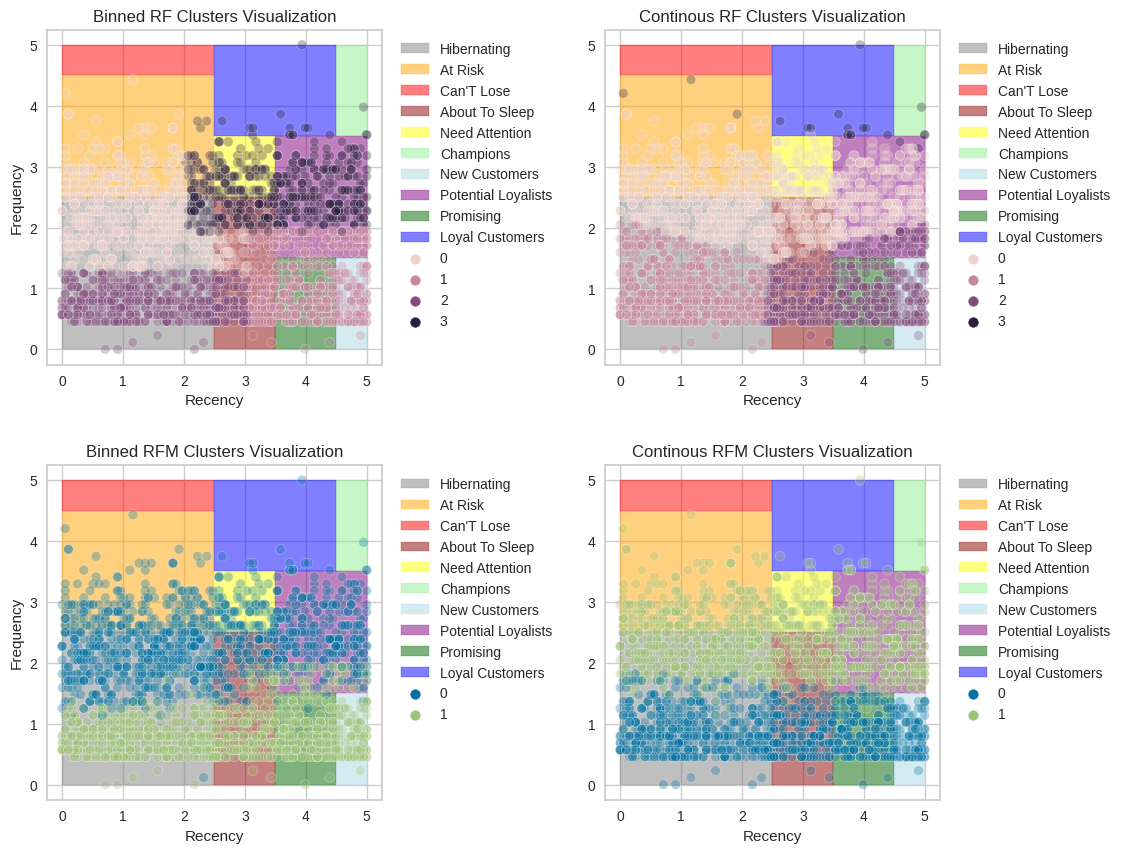

Binned RF_ms  Continous RF_ms  Binned RFM_ms  \
Silhouette             0.440882         0.322042       0.419788   
Calinski-Harabasz   2282.819523      1132.025804    2077.452700   
Davies-Bouldin         0.783274         0.936753       0.973466   

                   Continous RFM_ms  
Silhouette                 0.404113  
Calinski-Harabasz       1844.932431  
Davies-Bouldin             1.000785

In [52]:
#Produce the clustering visualization and print out the scores



# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["Binned RF", "Continous RF", "Binned RFM", "Continous RFM"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())
        
    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=str(f"{dataset_name}_ms_clustering"), alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)
plt.show()

#Show the clustering metrics
results_df


In [53]:
#Generate data needed for the sunburst charts and produce the sunburst charts:
clusters=["Binned RF_ms_clustering", "Continous RF_ms_clustering", "Binned RFM_ms_clustering", "Continous RFM_ms_clustering"]
comparison=generate_comparison_data(df=rfm, clustering_algorithms=clusters, segment_column="segment")
generate_sunburst_charts(comparison)

In [54]:
# Saving the selected clustering
#SegmentationFinal['RF with Cutoff_ms_cluster']=rfm['RF with Cutoff_ms_clustering']
#SegmentationFinal.head()

## DBSCAN
DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a powerful unsupervised machine learning algorithm used for clustering data points. Unlike traditional clustering algorithms that rely on the number of clusters or predefined shapes, DBSCAN identifies clusters based on the density of data points. This unique approach allows DBSCAN to discover clusters of arbitrary shapes and handle noise effectively.

The process of the DBSCAN algorithm unfolds as it identifies core points by assessing if a minimum number of neighboring points fall within a specified distance ε from each data point. These core points serve as starting points for forming clusters. Connected core points, along with their associated border points within ε-distance, are then grouped together to constitute a cluster. The algorithm iteratively expands each cluster until no more points can be added. Data points that aren't core or border points are designated as noise points, representing outliers. This process results in the discovery of clusters of varying shapes and effectively handles noise in the dataset, making DBSCAN a versatile and valuable tool for unsupervised clustering tasks.

It's important to mention that noise will be retained as a separate cluster in this analysis. If noise demonstrates potential to be a significant pattern rather than an outlier, the analysis will be revisited. In that case, the optimal clustering solution will be employed for further investigation.
### DBSCAN with RF binned values

The exploration of hyperparameters for these clusterings encompassed three potential epsilon distance values (0.1, 0.5, and 1), with minimum sample requirements set at either 2 or 5, and employing either the Euclidean or Cityblock (Manhattan) distance metrics. Surprisingly, outcomes emerged where epsilon distances below one yielded impeccable clusters, garnering a perfect silhouette score of 1 and an exceptionally low Davies-Bouldin score of 0. However, the Calinski-Harabasz score remained at an unusual value of 1. It's noteworthy that these algorithmic outputs were rigorously tested and verified to consistently yield the same clustering results. The cluster labels were also tested and they were shown to be the same (when clustering existed).

My presumption is that the data for the RF values was generated using this algorithm. 

In [55]:
#DBSCAN with RF binned values



# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_bin)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RF_bin, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 25
Silhouette Score: 0.9999999992252768
Calinski-Harabasz Score: 3.350600082775651e+31
Davies-Bouldin Score: 2.8482044377382974e-08
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}
Number of Clusters: 25
Silhouette Score: 0.9999999992252768
Calinski-Harabasz Score: 3.350600082775651e+31
Davies-Bouldin Score: 2.8482044377382974e-08
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}
Number of Clusters: 25
Silhouette Score: 0.9999999992252768
Calinski-Harabasz Score: 3.350600082775651e+31
Davies-Bouldin Score: 2.8482044377382974e-08
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'}
Number of Clusters: 25
Silhouette Score: 0.9999999992252768
Calinski-Harabasz Score: 3.350600082775651e+31


In [56]:
#Clustering
from sklearn.cluster import DBSCAN

# Fit DBSCAN models with different hyperparameters and store the results in a column
for params in hyperparameters:
    eps = params['eps']
    min_samples = params['min_samples']
    metric = params['metric']
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_bin)
    
    column_name = f"DBSCAN_{eps}_{min_samples}_{metric}"
    rfm[column_name] = labels


In [57]:
#Value counts (will not show until removal of comments)

new_df = rfm.drop(['R', 'F', 'M', 'R_score', 'F_score', 'M_score', 'RF_SCORE','segment','RF with Cutoff_kmeans_cluster','RF without Cutoff_kmeans_cluster','RFM without Cutoff_kmeans_cluster','RFM with Cutoff_kmeans_cluster','RF with Cutoff_agg_clustering','RF without Cutoff_agg_clustering','RFM with Cutoff_agg_clustering','RFM without Cutoff_agg_clustering'], axis=1)
import pandas as pd

# Assuming you have a DataFrame named 'df'
for column in new_df.columns:
    column_counts = new_df[column].value_counts()
    #print(f"Value counts for column '{column}':")
    #print(column_counts)
    #print('-' * 50)


KeyError: "['RF with Cutoff_kmeans_cluster', 'RF without Cutoff_kmeans_cluster', 'RFM without Cutoff_kmeans_cluster', 'RFM with Cutoff_kmeans_cluster', 'RF with Cutoff_agg_clustering', 'RF without Cutoff_agg_clustering', 'RFM with Cutoff_agg_clustering', 'RFM without Cutoff_agg_clustering'] not found in axis"

In [ ]:
#Testing how simmilar the clusterings are

reference_column = 'DBSCAN_0.1_2_euclidean'  # Specify the reference column name

# Iterate over each column in the DataFrame
for column in new_df.columns:
    if column != reference_column:
        is_same = new_df[column] == new_df[reference_column]
        if is_same.all():
            print(f"{column} is the same as {reference_column}.")
        else:
            print(f"{column} is different from {reference_column}.")

### DBSCAN with RF continous values


When applying the DBSCAN algorithm to continuous values, suboptimal clustering outcomes emerge when employing lower epsilon distances. The clustering results exhibit elevated Davies-Bouldin scores, surpassing 1.5, coupled with remarkably high cluster counts, reaching 437 and 140 for an epsilon value of 0.1. While the cluster count diminishes as the distance increases to 0.5, the remaining metrics remain notably skewed, with Calinski-Harabasz scores below 15 and Davies-Bouldin scores converging towards 1.

Adopting a distance of 1 yields favorable clustering solutions, featuring two well-defined clusters, a silhouette score of approximately 0.38, and a Davies-Bouldin score of about 0.62. The Calinski-Harabasz score hovers around 8, signifying the quality of the clustering. It's noteworthy that both the Euclidean and city block distances yield identical clustering results, indicating consistent data behavior across these two distance metrics.

Henceforth, we opt for the version characterized by an epsilon distance of 1, a minimum sample requirement of 5, and any applicable metric.

In [ ]:
#DBSCAN with RF continous values


# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_cont)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RF_cont, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


### DBSCAN with RFM binned values

When scrutinized with smaller epsilon distances, this dataset yields a multitude of extensive clusters (nearing 80) along with nearly flawless silhouette scores (approximately .99). However, the Calinski-Harabasz index and Davies-Bouldin scores exhibit extreme values. As the minimum number of samples rises, the silhouette scores experience a slight reduction, the Calinski-Harabasz score assumes a more typical value, yet the Davies-Bouldin score escalates even further (exceeding 1.4). Subsequent increments in epsilon distance lead to diminished cluster quantities, accompanied by insignificant silhouette scores (dipping below .2). We do not select any option.

In [ ]:
#DBSCAN with RFM binned values


# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RFM_bin)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RFM_bin, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


### DBSCAN with RFM continous values

Regrettably, for this dataset option, we must express dissatisfaction. The silhouette score exhibits a suboptimal performance even when subjected to multiplication by -1. Moreover, the Davies-Bouldin index associated with this clustering choice consistently hovers above 1, a clear indication of poor clustering quality. The Calinski-Harabasz score, too, presents an unsatisfactory outcome. No clustering will be selected. 

In [ ]:
#DBSCAN with RFM continous values


# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RFM_cont)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RFM_cont, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


## DBSCAN visualization

The visualizations below display the outcomes of DBSCAN clustering, accompanied by their respective evaluation scores:

- RF Cutoff Clustering (25 Clusters): All hyperparameter configurations for RF with cutoff values resulted in the same clustering with a total of 25 clusters( &#8598; in chart)
- RF without Cutoff Clustering (2 Clusters): The optimal clustering for RF without cutoff values employed an epsilon of 0.5 with Euclidean distance, requiring a minimum of five samples per cluster. This yielded 2 clusters ( &#8599; in chart)
- RFM Cutoff Clustering (78 Clusters): Clustering based on RFM with cutoff values resulted in 78 clusters( &#8601; in chart)
- RFM without Cutoff Clustering (2 Clusters): Using an epsilon of 1, cityblock distance, and a minimum of five samples per cluster, RFM without cutoff values produced 2 clusters ( &#8600; in chart)

While the DBSCAN results exhibit a wide range of cluster counts and evaluation scores, it's important to note that the clustering with 25 clusters from the RF with cutoff values stands out. This specific clustering presents challenges in profiling due to the large number of clusters. Strikingly, its evaluation scores are somewhat unusual, with a perfect silhouette score of 1, a Davies-Bouldin index of 0, and a very low Calinski-Harabasz index.

The other clusterings, especially those without cutoff values, may be more suitable for identifying outliers as they either define them as noise or as distinct clusters. Notably, the RFM version of the dataset achieved an almost perfect silhouette score but also an implausibly low Davies-Bouldin index, suggesting some peculiarities in the data.

In [ ]:
#Comparing the top clusters produced by DBSCAN clustering

#instantiating the results_df to hold the metrics:
results_df = pd.DataFrame(index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

for dataset_name, dataset, hyperparam in zip(["Binned RF", "Continous RF", "Binned RFM", "Continous RFM"],
                                            [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                             [(0.1,2,"euclidean"),(1.0,5,"euclidean"),(0.1,2,"euclidean"),(1,5,"cityblock")]):
    eps, min_samples, metric = hyperparam
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    rfm[f"{dataset_name}_DBSCAN_clustering"] = clusterer.fit_predict(dataset)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_DBSCAN_clustering"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_DBSCAN_clustering"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_DBSCAN_clustering"])
    #Transfering the results to the dataframe
    results_df[f"{dataset_name}_DBSCAN"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]


In [ ]:
#Produce the clustering visualization and print out the scores



# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["Binned RF", "Continous RF", "Binned RFM", "Continous RFM"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())
        
    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=str(f"{dataset_name}_DBSCAN_clustering"), alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()
display(results_df)

In [ ]:
#Generate data needed for the sunburst charts and produce the sunburst charts:
clusters=["Binned RF_DBSCAN_clustering", "Continous RF_DBSCAN_clustering", "Binned RFM_DBSCAN_clustering", "Continous RFM_DBSCAN_clustering"]
comparison=generate_comparison_data(df=rfm, clustering_algorithms=clusters, segment_column="segment")
generate_sunburst_charts(comparison)

In [ ]:
# Saving the selected clustering
#SegmentationFinal['RF with Cutoff_DBSCAN_cluster']=rfm['RF with Cutoff_DBSCAN_clustering']

#SegmentationFinal.head()

## Clustering conclusion

Concluding the clustering phase, our analysis has unearthed intriguing customer segments based on recency, frequency, and monetary value of purchases. We've diligently explored various clustering algorithms to decipher the underlying structure of these segments.

As we progress to the next phase, the focus shifts towards validating these segments. Our aim is to determine the feasibility of predicting customer segments using additional provided data. This validation process is crucial, not only for refining customer profiling but also for gaining deeper insights into the drivers behind distinct consumer behaviors. These insights will be instrumental in making strategic marketing decisions.

It's worth noting the exceptional quality of the dataset, even without direct communication with its source, raises compelling questions. The clustering results appear remarkably precise, possibly indicating that this dataset is synthesized from a sophisticated model, adding an extra layer of complexity to our analysis.

# Distinctiveness and identifibility

In the realm of marketing, distinctiveness and identifiability of market segments are pivotal for crafting effective marketing strategies. Distinctiveness refers to the unique characteristics and traits that set one segment apart from another. Identifiability, on the other hand, concerns the ease with which these segments can be recognized and targeted. These factors influence the precision and efficiency of marketing campaigns, ultimately determining their success. To explore these aspects, data-driven techniques like decision trees and XGBoost are employed to predict clusters within the dataset.

The process begins with preprocessing variables, which may include techniques such as label encoding to ensure the data is in a suitable format for machine learning models. After applying these preprocessing steps, the algorithms are evaluated using a range of metrics, including accuracy, precision, recall, specificity, and the F1 score. These metrics provide a comprehensive view of the model's performance in classifying data into distinct segments. By comparing the results of decision trees and XGBoost, marketers can identify which algorithm better captures the distinctiveness and identifiability of segments.

To delve deeper into the analysis, ROC-AUC curves are utilized to visualize the models' ability to distinguish between segments in a multiclass context. Additionally, class prediction errors and classification reports offer insights into the model's strengths and weaknesses for each segment. Finally, a feature analysis is conducted to uncover which variables contribute the most to segment identification. This information becomes invaluable for customer profiling, allowing marketers to tailor their strategies to meet the specific needs and preferences of each segment, ultimately enhancing the distinctiveness and identifiability of their target audience.

## Preprocessing

Based on the head function's output, it's evident that two columns require transformation, specifically "Education" and "Marital_Status." Furthermore, for the purpose of constructing a predictive model for clusters, certain columns such as "Dt_Customer," "MissingFlag," "R," "F," and "M" need to be excluded. The transformation of the mentioned columns will involve the use of dummies for the categorical variables. Other transformations include transforming the cutoff clustering(the manual, first clustering) labels into numeric values for the purpose of modelling (models tend to require even the categorical values they are predicting to be in numeric format). These labels are however saved for analysis, should the model produce viable results to be included in future analysis.  

In [ ]:
df.head()

In [ ]:
# preparing the columns
cluster_details = df.drop(["R", "F", "M", "MissingFlag", "Dt_Customer","NumWebVisitsMonth","AcceptedCmp3" ,"AcceptedCmp4" ,"AcceptedCmp1" ,"AcceptedCmp2" ,"Complain" ,"AcceptedCmp6","TenureDays"], axis=1)

# Extract columns to be one-hot encoded
columns_to_encode = ["Education", "Marital_Status"]

# Use the pandas get_dummies function for one-hot encoding
cluster_details = pd.get_dummies(cluster_details, columns=columns_to_encode, drop_first=True)

# Now cluster_details contains the one-hot encoded columns without NaN values
#cluster_details.head()


In [ ]:
cluster_details["Income"].isnull().sum()

In [ ]:
#Showing the clusterings
SegmentationFinal.head()

In [ ]:
# Create a mapping DataFrame for the "Cutoff" column
cutoff_mapping = pd.DataFrame({'Cutoff': SegmentationFinal['Cutoff'].unique()})
cutoff_mapping['Cutoff_Numeric'] = range(len(cutoff_mapping))

# Display the mapping DataFrame
print(cutoff_mapping)


SegmentationFinal=SegmentationFinal.merge(cutoff_mapping, left_on="Cutoff", right_on="Cutoff", how="left")


In [ ]:
#Checking if the merge worked
#display(SegmentationFinal["Cutoff_Numeric"].value_counts())
#display(SegmentationFinal["Cutoff"].value_counts())
SegmentationFinal.drop("Cutoff", axis=1, inplace=True)
#SegmentationFinal.head()

In this section, we embark on a comprehensive evaluation of multiple models, each paired with different clustering approaches. The objective is to make an informed decision based on a holistic view of statistical performance and practical usability.




#### Please note that the code for the crossvalidation analysis has been commented out due to runtime purposes. Should you wish to review the results, please do not hesitate to uncomment.

In [ ]:
#Creating the dataframe with the output of the cluster prediction analysis

# Create a list of dictionaries containing the data
data = [
    {'ModelType': 'Decision Tree', 'Dataset': 'RF with Cutoff_kmeans_cluster', 'Accuracy': 0.429530, 'F1 Score': 0.432924, 'Precision': 0.440566, 'Recall': 0.429530, 'Specificity': 0.429530, 'CV Mean Score': 0.546512, 'CV Std Dev': 0.447860, 'Hyperparameters': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'RF with Cutoff_kmeans_cluster', 'Accuracy': 0.496644, 'F1 Score': 0.497534, 'Precision': 0.499488, 'Recall': 0.496644, 'Specificity': 0.496644, 'CV Mean Score': 0.626168, 'CV Std Dev': 0.517369, 'Hyperparameters': {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300}},
    {'ModelType': 'Decision Tree', 'Dataset': 'RF with Cutoff_agg_clustering', 'Accuracy': 0.342282, 'F1 Score': 0.340176, 'Precision': 0.343249, 'Recall': 0.342282, 'Specificity': 1.000000, 'CV Mean Score': 0.324032, 'CV Std Dev': 0.031530, 'Hyperparameters': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'RF with Cutoff_agg_clustering', 'Accuracy': 0.402685, 'F1 Score': 0.389310, 'Precision': 0.398965, 'Recall': 0.402685, 'Specificity': 0.955556, 'CV Mean Score': 0.359328, 'CV Std Dev': 0.043088, 'Hyperparameters': {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}},
    {'ModelType': 'Decision Tree', 'Dataset': 'RFM with Cutoff_ms_cluster', 'Accuracy': 0.449664, 'F1 Score': 0.452599, 'Precision': 0.459699, 'Recall': 0.449664, 'Specificity': 0.883333, 'CV Mean Score': 0.409780, 'CV Std Dev': 0.028999, 'Hyperparameters': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'RFM with Cutoff_ms_cluster', 'Accuracy': 0.456376, 'F1 Score': 0.453291, 'Precision': 0.452755, 'Recall': 0.456376, 'Specificity': 0.909091, 'CV Mean Score': 0.445091, 'CV Std Dev': 0.024126, 'Hyperparameters': {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}},
    {'ModelType': 'Decision Tree', 'Dataset': 'RF with Cutoff_DBSCAN_cluster', 'Accuracy': 0.178971, 'F1 Score': 0.179521, 'Precision': 0.194623, 'Recall': 0.178971, 'Specificity': 1.000000, 'CV Mean Score': 0.195110, 'CV Std Dev': 0.029060, 'Hyperparameters': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'RF with Cutoff_DBSCAN_cluster', 'Accuracy': 0.170022, 'F1 Score': 0.166700, 'Precision': 0.173066, 'Recall': 0.170022, 'Specificity': 1.000000, 'CV Mean Score': 0.211911, 'CV Std Dev': 0.031416, 'Hyperparameters': {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}},
    {'ModelType': 'Decision Tree', 'Dataset': 'RFM with Cutoff_DBSCAN_cluster', 'Accuracy': 0.183445, 'F1 Score': 0.186307, 'Precision': 0.205364, 'Recall': 0.183445, 'Specificity': 1.000000, 'CV Mean Score': 0.196780, 'CV Std Dev': 0.026804, 'Hyperparameters': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'RFM with Cutoff_DBSCAN_cluster', 'Accuracy': 0.170022, 'F1 Score': 0.166700, 'Precision': 0.173066, 'Recall': 0.170022, 'Specificity': 1.000000, 'CV Mean Score': 0.211911, 'CV Std Dev': 0.031416, 'Hyperparameters': {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}},
    {'ModelType': 'Decision Tree', 'Dataset': 'Cutoff_Numeric', 'Accuracy': 0.310962, 'F1 Score': 0.310025, 'Precision': 0.318196, 'Recall': 0.310962, 'Specificity': 0.920000, 'CV Mean Score': 0.309419, 'CV Std Dev': 0.041384, 'Hyperparameters': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}},
    {'ModelType': 'XGBoost', 'Dataset': 'Cutoff_Numeric', 'Accuracy': 0.333333, 'F1 Score': 0.323439, 'Precision': 0.327917, 'Recall': 0.333333, 'Specificity': 0.914286, 'CV Mean Score': 0.364939, 'CV Std Dev': 0.029437, 'Hyperparameters': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}}
]

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
# Display the DataFrame
results_df


In [ ]:
SegmentationFinal.head()

In [ ]:
#The crossvalidation model analysis, uncomment to run


#Scaling the data
standard_scaler = StandardScaler()
cluster_details = standard_scaler.fit_transform(cluster_details)

# Split the data into features (X) and the target (y)
X = cluster_details
results_df = pd.DataFrame(columns=['Dataset', 'Column', 'Model', 'Accuracy',  'F1 Score', 'Precision', 'Recall',  'CV Mean Score', 'CV Std Dev', 'Hyperparameters'])

# Loop through all columns in SegmentationFinal
for column in SegmentationFinal.columns:
    y = SegmentationFinal[column]

    # Define a function to train and evaluate a classification model
    def train_and_evaluate_model(model_name, model, param_grid, scoring):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create a GridSearchCV object with 10-fold cross-validation
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring=scoring,
            cv=10,
            n_jobs=-1,
            verbose=1
        )

        # Fit the model to the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Perform cross-validation to evaluate the model
        cv_results = cross_val_score(best_model, X_train, y_train, cv=10, scoring=scoring)

        # Fit the best model on the full training data
        best_model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])

        # Return the evaluation metrics along with hyperparameters
        hyperparameters = grid_search.best_params_

        return {
            'Column': column,
            'Model': model_name,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'CV Mean Score': np.mean(cv_results),
            'CV Std Dev': np.std(cv_results),
            'Hyperparameters': hyperparameters
        }

    # Define hyperparameter grids for Decision Tree and XGBoost
    param_grid_dt = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    param_grid_xgb = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    
    param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }

    # Train and evaluate Decision Tree model
    dt_model = DecisionTreeClassifier()
    dt_results = train_and_evaluate_model("Decision Tree", dt_model, param_grid_dt, 'accuracy')
    results_df = results_df.append(dt_results, ignore_index=True)

    # Train and evaluate XGBoost model
    xgb_model = XGBClassifier()
    xgb_results = train_and_evaluate_model("XGBoost", xgb_model, param_grid_xgb, 'accuracy')
    results_df = results_df.append(xgb_results, ignore_index=True)
    
    
    # Train and evaluate K-Nearest Neighbors model
    knn_model = KNeighborsClassifier()
    knn_results = train_and_evaluate_model("K-Nearest Neighbors", knn_model, param_grid_knn, 'accuracy')
    results_df = results_df.append(knn_results, ignore_index=True)



In [ ]:
# Display the evaluation results (uncomment the code above first)
pd.set_option('display.max_colwidth', None)
results_df

In [ ]:
SegmentationFinal.columns

In [ ]:
#Analyzing XGBoos for predicting the kmeans clustering


## Model analysis

As already mentioned, the model analysis will feature the analysis of the ROC curves per each of the classes, the class prediction output, the feature importances, as well as the classification reports. 


### ROC Curves

These are useful when trying to understand the quality of prediction per class. Please note that as yellowbrick was designed primarily with the scikit-learn package in mind. As such, certain options like crossvalidation are not possible. This means that the model prepared for predicting these classes, has better results than shown. This output also provides a micro and macro average AUC curve. The macro-average AUC is calculated by taking the average AUC, giving the same weigth to all classes. It is useful for evaluating how the model the performance on a per class basic, showing which classes the model predicts better or worse. The micro-average on the other hand treats all predictions equally, allowing for comparing among models. 

Observing the curves below it becomes clear there is miniscule difference between the micro-average of these models. Surprisingly even, the XGBoost predicting the agglomerative clustering labels performs better when observing the micro-average. 


In [ ]:
# Preparing the models for visualization


y1=SegmentationFinal["RF with Cutoff_kmeans_cluster"]
X = cluster_details


# Define classes for y1 and y2
classes1 = [0, 1, 2, 3]


# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(cluster_details, y1, random_state=42)

# Create and fit the XGBoost model (for y1)
model1 = wrap(XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=300))
model1.fit(X_train, y1_train)

# Create and fit the XGBoost model (for y2)
model2 = wrap(DecisionTreeClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2))
model2.fit(X_train, y1_train)


In [ ]:
#Visualizing the ROCAUC curves

# Create the first figure for y1
fig1, ax1 = plt.subplots(figsize=(7, 6))

# ROCAUC for y1
display(print("ROC for kmeans clustering classes"))
visualizer1 = ROCAUC(model1, classes=classes1, ax=ax1)
visualizer1.fit(X_train, y1_train)
visualizer1.score(X_test, y1_test)
visualizer1.show()

# Create the second figure for y2
fig2, ax2 = plt.subplots(figsize=(7, 6))

# ROCAUC for y2
display(print("ROC for agglomerative clustering classes"))
visualizer2 = ROCAUC(model2, classes=classes1, ax=ax2)
visualizer2.fit(X_train, y1_train)
visualizer2.score(X_test, y1_test)
visualizer2.show()

plt.tight_layout()
plt.show()


In [ ]:
#Visualizing class predictions

# Class Prediction Error for y1
visualizer3 = ClassPredictionError(model1)
visualizer3.fit(X_train, y1_train)
visualizer3.score(X_test, y1_test)

visualizer3.show()

# Class Prediction Error for y2
visualizer4 = ClassPredictionError(model2)
visualizer4.fit(X_train, y1_train)
visualizer4.score(X_test, y1_test)
visualizer4.show()

In [ ]:
# Preparing the classification reports

# Classification Report for y1
visualizer5 = ClassificationReport(model1, classes=classes1, support=True)
visualizer5.fit(X_train, y1_train)
visualizer5.score(X_test, y1_test)
visualizer5.show()

# Classification Report for y2
visualizer6 = ClassificationReport(model2, classes=classes1, support=True)
visualizer6.fit(X_train, y1_train)
visualizer6.score(X_test, y1_test)
visualizer6.show()

In [ ]:
#Visualizing feature importances

# Feature Importances for y1
oz1 = feature_importances(model1, X_test, y1_test, is_fitted=True)

# Feature Importances for y2
oz2 = feature_importances(model2, X_test, y1_test, is_fitted=True)

## Customer Profiling

In today's dynamic and competitive business landscape, understanding your customers is paramount to success. Customer profiling, often hailed as the cornerstone of marketing and business strategy, empowers organizations to go beyond mere demographics and dive deep into the intricacies of consumer behavior. By constructing comprehensive customer profiles, businesses gain invaluable insights into the preferences, needs, and motivations of their target audience. This knowledge serves as the bedrock for tailoring products, services, and marketing campaigns that resonate with customers on a personal level. In this chapter, we embark on a journey to explore the art and science of customer profiling, revealing how it unlocks the doors to enhanced customer engagement, loyalty, and ultimately, sustainable growth.

The first part of this chapter contains initital preprocessing. This is because for the profiling part of the analysis it would not make sense to use the details for creating the RFM variables, we return these variables for profiling purposes.

The second part deals with the cluster sizes and observes the details on their spendings. This will feature behavioral details, such as the amount they spend on products and where they buy. Even though we know the promotional effects the company uses were miniscule, we also want to know which cluster reacted to the promotions.

The third part features the demographic analysis, the income of the clusters, their marital status, their age, and their education.

The final part aims to summarize the demographic and behavioral details of the clusterings and provide a final summary of the profiles ending with the personas of each cluster.

## Preprocessing

The amount featues as well as the number of purchases per place were removed to not influence

In [ ]:
#Dataset preparation and head
cluster_analysis=cluster_details.copy()
cluster_analysis["Segments"]=SegmentationFinal["RF with Cutoff_kmeans_cluster"]

#Re-adding some lost data
df2=pd.read_csv("marketing_campaign.csv",delimiter="\t")
columns_to_append = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Append columns from df2 to cluster_analysis
cluster_analysis = pd.concat([cluster_analysis, df2[columns_to_append]], axis=1)

#Note that because we are using the old uncleaned dataset to add the amount values, there are 9 extra observations
#These are removed below
#len(cluster_analysis)
#len(cluster_details)
cluster_analysis.dropna(subset=['Income'], inplace=True)
cluster_analysis.head()


In [ ]:
#binning and preparing the sunburst

#binning into five bins
cluster_analysis['IncomeQuantile'] = pd.qcut(cluster_analysis['Income'], q=5, labels=False)
bin_counts = cluster_analysis.groupby(['Segments', 'IncomeQuantile']).size().reset_index(name='Count')

fig = px.sunburst(bin_counts, path=['Segments', 'IncomeQuantile'], values='Count')

# Customize the appearance of the chart (e.g., labels, colors, layout)
fig.update_traces(textinfo='percent parent+label')
fig.update_layout(title='Sunburst Chart of Segments by Income Quantile')


In [ ]:
#ANOVA for income by clusters
import scipy.stats as stats

# Assuming you have a DataFrame 'cluster_analysis' with 'Income' and 'IncomeCluster' columns
income_data = []

# Minimum number of data points required for ANOVA
min_data_points = 5  # You can adjust this threshold

# Extract income data for each cluster with sufficient data points
for cluster in cluster_analysis['Segments'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Segments'] == cluster]['Income']
    
    # Check if the cluster has enough data points
    if len(cluster_data) >= min_data_points:
        income_data.append(cluster_data)

# Perform one-way ANOVA if there are clusters with sufficient data
if income_data:
    f_statistic, p_value = stats.f_oneway(*income_data)

    # Print the results
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Define a significance level (e.g., 0.05)
    alpha = 0.05

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There are significant differences in income between clusters.")
    else:
        print("Fail to reject the null hypothesis: There are no significant differences in income between clusters.")
else:
    print("No clusters have sufficient data points for ANOVA.")


## Behavioral analysis

### Cluster size

Observing the pie chart below we see that the sizes of each clusters do not differ much but nevertheless, cluster 0 is the largest almost spanning 30% of the observations. The second largest cluster is cluster 3 containing approximately 25% of the observations while clusters 1 and 2 have almost the same size(23%). 

In [ ]:
#pie chart showing segment size
segment_counts = cluster_analysis['Segments'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Observations per Segment')
plt.show()

Great, let's proceed with profiling the segments in your `cluster_analysis` DataFrame. Profiling segments involves gaining insights into the characteristics of each segment to better understand the customer groups. We can perform various types of analysis to achieve this, including descriptive statistics, visualization, and interpretation of the data.

Here are some steps you can take to profile the segments:

1. **Descriptive Statistics**: Calculate summary statistics for each segment, such as mean, median, standard deviation, and quartiles, for numerical variables like 'Income', 'NumWebVisitsMonth', 'Age', and 'TenureDays'. For categorical variables like 'Education', 'Marital_Status', and 'Complain', calculate frequency counts.

2. **Visualization**: Create visualizations to compare segments. For numerical variables, you can create box plots, histograms, or bar plots. For categorical variables, use bar charts or pie charts to show the distribution of categories within each segment. Additionally, consider scatter plots to explore relationships between numerical variables.

3. **Segment Size**: Determine the size of each segment (i.e., the number of customers in each segment). This can give you an idea of the relative importance of each group.

4. **Segment Characteristics**: Summarize the key characteristics of each segment. For example, you might find that one segment consists primarily of younger customers with higher incomes, while another segment contains older customers with lower incomes.

5. **Segment Insights**: Interpret the findings. What do the characteristics of each segment suggest? Are there any patterns or trends? Do certain segments respond better to marketing campaigns or have higher complaint rates?

6. **Recommendations**: Based on the insights, consider making recommendations for marketing strategies or product/service offerings tailored to each segment. For example, you might recommend specific marketing campaigns targeted at segments with a higher likelihood of responding positively.

To get started, you can use Python libraries like Pandas, Matplotlib, Seaborn, and Plotly for data manipulation, visualization, and analysis. If you have specific questions or need assistance with any part of the profiling process, please let me know, and I'll be happy to help!

Suggestions for further improvement. Extend the metrics to feature those that take into consideration more abstract cluster shapes such as CDbw, conectivity based metrics, as well as those metrics specific to the clustering algorithm itself. 